In [1]:
#import needed modules
import os
import glob
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# Mapping Data Files: Google Drive

If uploading this notebook to Google Colab, the following section provides instruction on how to store the data files into Google Drive, mount that drive, and read in those files from the Google Drive location.

In [3]:
#comment: uncomment this following 2 lines of code if utilizing Google Colab / Google Drive:
#from google.colab import drive
#drive.mount("/content/drive")

In [4]:
#Upload the files to a Google Drive folder named "Home_Energy_Independence_Data".
#Expose the drive containing the data files to the Google Colab notebook
#If the drive location is shared by another colaborator, first manually add a shortcut to the folder in Google Drive.

#To add the shortcut:
#1.) go to google drive
#2.) navigate to the shared with me folder
#3.) select the IST652 Project Data folder and drag and drop it ontop of the My Drive folder on the left hand menu.  This will create a shortcut.
#4.) navigate to the google colab notebook (here) aand verify that the folder shows under files on the left-hand side.

The following section shows the data retrieval of the primary data files used for this analysis: powerwall, charging data, and usage and export data.  Data is read from .CSV files and stored in dataframes.

In [6]:
#comment: uncomment this following 3 lines of code if utilizing Google Colab / Google Drive:
#path_1 = "/content/drive/MyDrive/Home_Energy_Independence_Data/powerwall.csv"
#path_2 = "/content/drive/MyDrive/IST652 Project Data/ChargingData20240614.csv"
#path_3 ="/content/drive/MyDrive/IST652 Project Data/usage and export rates.csv"

# Mapping Data Files: Anaconda & Jupyter Notebook

If running this notebook in Anaconda using Jupyter: Download the data files to the following paths on your local computer and run the read the data.

In [8]:
#define the paths if utilizing anaconda jupyter notebook
path_1 = r"C:\project_data\Home_Energy_Independence_Data\powerwall.csv"
path_2 = r"C:\project_data\Home_Energy_Independence_Data\ChargingData20240614.csv"
path_3 = r"C:\project_data\Home_Energy_Independence_Data\usage and export rates.csv"

# Data Retrieval: Read in Data and Create Dataframes

If running this notebook in Anaconda using Jupyter: Download the data files to the following paths on your local computer and run the read the data.

In [10]:
#load in the powerwall data:
powerwall_data = pd.read_csv(path_1)
powerwall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9215 entries, 0 to 9214
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  9215 non-null   object 
 1   Time                  9215 non-null   object 
 2   Home (kW)             9215 non-null   float64
 3   Powerwall (kW)        9215 non-null   float64
 4   Solar (kW)            9215 non-null   float64
 5   Grid (kW)             9215 non-null   float64
 6   Energy Remaining (%)  9215 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 504.1+ KB


In [11]:
#read in the EV charging data
ev_charging_data = pd.read_csv(path_2)
ev_charging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      20 non-null     object 
 1   EndTime   20 non-null     int64  
 2   Duration  20 non-null     object 
 3   Energy    20 non-null     float64
 4   Miles     20 non-null     int64  
 5   Cost      20 non-null     float64
dtypes: float64(2), int64(2), object(2)
memory usage: 1.1+ KB


In [12]:
#read in the usage and export rates data
usage_export_rates_data = pd.read_csv(path_3)
usage_export_rates_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Type of Rate              3 non-null      object 
 1   Overnight (9pm - 9am)     3 non-null      float64
 2   Daytime (9am - 5pm)       3 non-null      float64
 3   Evening Peak (5pm - 9pm)  3 non-null      float64
dtypes: float64(3), object(1)
memory usage: 228.0+ bytes


# Data Summary: Attribute Review

The powerwall_data dataframe contains all energy consumption data measured at 5 minute intervals each day.  

Attribute Summary:
*   Home (kW): power in kW used during this time; total should equal powerwall + solar + grid with some rounding errors
*   Powerwall (kW): If negative, amount charged in kW.  If positive, amount used in kW.
*   Solar (kW): amount produced in kW during the observed period
*   Grid (kW): If negative, amount sold back in kW.  If positive, amount used in kW.
*   Energy Remaining: % of energy remaining in the Powerwalls (observed every 15 minutes rather than 5)
*   Date: The date of Day in MM/DD/YYYY format
*   Time: The time the measurement was taken in HH:MM format





The charging_data dataframe contains key metricsa from charging a 2024 Kia Nero for 2 months of data.  The first month pre-dates the installation of the home solar power project was implemented.  The second month of data is concurrent with the time period of energy consumption in the powerwall_data dataset.

Attribute Summary:
*   Date: date of charging session
*   EndTime: time the charging session ended
*   Duration: time in hours and minutes that the charging session lasted
*   Energy: energy charged to the vehicle in kWh
*   Miles: estimated mileage provided based on the type of car (2024 Kia Nero)
*   Cost: estimated value of the energy based on Hawaii Electric Company Rate

The usage_export_rates_data dataframe contains the price of Electic Energy as dictated by Hawaiian Eletric.  

Attribute Summary:
* The data set contains the Hawaiin Electric Company pricing data at 3 daily time intervals; Overnight (9pm - 9am), Daytime (9am - 5pm), and Evening Peak (5pm - 9 pm).
* The data also contains Export pricing for these daily intervals representingt the price that Hawaiian Electric will pay to solar providers returning Energy to the Grid.

This data can be used as a lookup table to cross reference against powerwall data to value and/or forecast home energy cost reductions due to solar offsets.

In [17]:
usage_export_rates_data.head(10)

,Type of Rate,Overnight (9pm - 9am),Daytime (9am - 5pm),Evening Peak (5pm - 9pm)
0,Export,18.9000,13.5000,32.9000
1,Aug,39.7562,39.7562,39.7562
2,Jul,39.3382,39.3382,39.3382


In [18]:
#define class to format print() output text for readability

class PrettyText:
    BOLD_START = '\033[1m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'

# **Data Transformation**

The following section transforms the total energy consumption data from the powerwall.csv file into a time series data frame.  The Date and Time columns are combined to create a new Datetime column, which is then used as the index of the timeseries dataframe.   

In [20]:
# Step 1: Convert 'date' and 'time' columns to strings and then combine them
powerwall_data['datetime_str'] = powerwall_data['Date'] + ' ' + powerwall_data['Time']

# Step 2: Convert the combined string to datetime
powerwall_data['Date_Time'] = pd.to_datetime(powerwall_data['datetime_str'], format='%m/%d/%Y %H:%M')

# Step 3: Set the Date_Time column as the index
powerwall_data.set_index('Date_Time', inplace=True)

# Step 4: Drop the unneeded columns
powerwall_data.drop(columns=['datetime_str'], inplace=True)
powerwall_data.drop(columns=['Date'], inplace=True)
powerwall_data.drop(columns=['Time'], inplace=True)

In [21]:
powerwall_data.head(10)

,Home (kW),Powerwall (kW),Solar (kW),Grid (kW),Energy Remaining (%)
Date_Time,,,,,
2024-08-01 00:00:00,0.4,0.3,0.0,0.0,78
2024-08-01 00:05:00,0.4,0.4,0.0,0.0,78
2024-08-01 00:10:00,0.4,0.3,0.0,0.0,78
2024-08-01 00:15:00,0.3,0.3,0.0,0.0,77
2024-08-01 00:20:00,0.3,0.3,0.0,0.0,77
2024-08-01 00:25:00,0.3,0.3,0.0,0.0,77
2024-08-01 00:30:00,0.4,0.4,0.0,0.0,77
2024-08-01 00:35:00,0.4,0.4,0.0,0.0,77
2024-08-01 00:40:00,0.4,0.4,0.0,0.0,77


In [22]:
powerwall_data.dtypes

Home (kW)               float64
Powerwall (kW)          float64
Solar (kW)              float64
Grid (kW)               float64
Energy Remaining (%)      int64
dtype: object

The following section transforms the Kia EV Charging Data into a time series dataframe.

In [24]:
# Step 1: Combine 'Date' and 'EndTime' into 'Charging End'
# Convert 'Date' to datetime format
ev_charging_data['Date'] = pd.to_datetime(ev_charging_data['Date'], format='%m/%d/%Y')

# Convert 'EndTime' to string, zero-pad to ensure 4 digits, and convert to time
ev_charging_data['EndTime_str'] = ev_charging_data['EndTime'].astype(str).str.zfill(4)
ev_charging_data['EndTime'] = ev_charging_data['EndTime_str'].apply(lambda x:datetime.strptime(x, '%H%M').time())

# Combine 'Date' and 'EndTime' into a datetime column
ev_charging_data['Charging End'] = ev_charging_data.apply(lambda row: datetime.combine(row['Date'], row['EndTime']), axis=1)


# Step 2: Calculate 'Charging Start' by subtracting 'Duration' from Charging End
def parse_duration(duration_str):
    """Convert a duration string (e.g., '5h33m') to a timedelta object."""
    hours = minutes = 0
    if 'h' in duration_str:
        hours = int(duration_str.split('h')[0])
        duration_str = duration_str.split('h')[1]
    if 'm' in duration_str:
        minutes = int(duration_str.replace('m', ''))
    return timedelta(hours=hours, minutes=minutes)

# Convert 'Duration' to timedelta and subtract from 'Charging End'
ev_charging_data['Duration'] = ev_charging_data['Duration'].apply(parse_duration)
ev_charging_data['Charging Start'] = ev_charging_data['Charging End'] - ev_charging_data['Duration']

#Step 3: set the new index
# Convert 'Date' column to the desired format
ev_charging_data['Index_Date'] = ev_charging_data['Date'].dt.strftime('%m/%d/%Y %H:%M')
ev_charging_data.set_index('Index_Date', inplace=True)


# Step 4: Drop Unnecessary columns
ev_charging_data.drop(columns=['EndTime_str'], inplace=True)
ev_charging_data.drop(columns=['EndTime'], inplace=True)
ev_charging_data.drop(columns=['Date'], inplace=True)

In [25]:
ev_charging_data.head(10)

,Duration,Energy,Miles,Cost,Charging End,Charging Start
Index_Date,,,,,,
08/10/2024 00:00,0 days 05:53:00,35.1108,137,13.45,2024-08-10 14:03:00,2024-08-10 08:10:00
08/09/2024 00:00,0 days 02:51:00,17.5395,68,6.71,2024-08-09 19:13:00,2024-08-09 16:22:00
08/07/2024 00:00,0 days 01:37:00,11.4924,45,4.40,2024-08-07 19:41:00,2024-08-07 18:04:00
08/03/2024 00:00,0 days 01:01:00,9.0336,35,3.38,2024-08-03 17:13:00,2024-08-03 16:12:00
08/01/2024 00:00,0 days 05:26:00,31.8084,124,11.92,2024-08-01 20:19:00,2024-08-01 14:53:00
07/28/2024 00:00,0 days 02:55:00,19.8298,77,7.51,2024-07-28 21:33:00,2024-07-28 18:38:00
07/27/2024 00:00,0 days 05:21:00,33.2677,130,12.60,2024-07-27 20:34:00,2024-07-27 15:13:00
07/24/2024 00:00,0 days 03:53:00,23.8666,93,5.42,2024-07-24 20:30:00,2024-07-24 16:37:00
07/23/2024 00:00,0 days 02:02:00,15.3534,60,5.17,2024-07-23 21:53:00,2024-07-23 19:51:00


In [26]:
ev_charging_data.dtypes

Duration          timedelta64[ns]
Energy                    float64
Miles                       int64
Cost                      float64
Charging End       datetime64[ns]
Charging Start     datetime64[ns]
dtype: object

# **Exploratory Data Analysis**

The Total energy consumption data from the Powerwall time series data is explored and summarized.  

In [28]:
# Summary Statistics
powerwall_summary_statistics = powerwall_data.describe()
print("\n")
print(PrettyText.BOLD_START + PrettyText.BLUE + "Total Energy Consumption Statistics:"  + PrettyText.END)
print("\n")
print(powerwall_summary_statistics)



Total Energy Consumption Statistics:


         Home (kW)  Powerwall (kW)   Solar (kW)    Grid (kW)  \
count  9215.000000     9215.000000  9215.000000  9215.000000   
mean      1.559295       -0.077949     1.412046     0.223266   
std       2.016701        2.001536     1.898738     1.360534   
min       0.200000       -5.200000     0.000000    -4.300000   
25%       0.400000       -0.800000     0.000000     0.000000   
50%       1.000000        0.000000     0.100000     0.000000   
75%       1.700000        0.500000     2.800000     0.000000   
max      15.800000       11.400000     6.000000    14.900000   

       Energy Remaining (%)  
count           9215.000000  
mean              47.028866  
std               26.812678  
min                9.000000  
25%               20.000000  
50%               46.000000  
75%               67.000000  
max              100.000000  


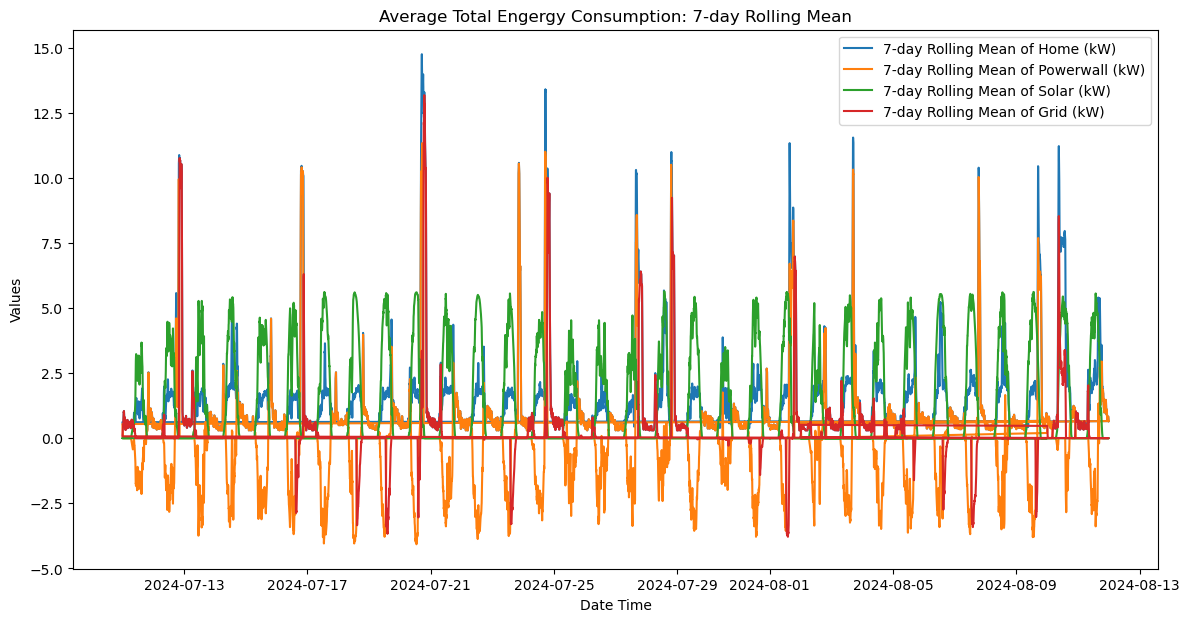

In [29]:
# Rolling Statistics
# Example: Calculate a 7-day rolling mean for each column
rolling_means = powerwall_data.rolling(window=7).mean()
plt.figure(figsize=(14, 7))
for column in rolling_means.columns:
  #exclude energy remaining as it is a different unit of measure
  if column != 'Energy Remaining (%)':
    plt.plot(rolling_means.index, rolling_means[column], label=f'7-day Rolling Mean of {column}')
plt.title('Average Total Engergy Consumption: 7-day Rolling Mean')
plt.xlabel('Date Time')
plt.ylabel('Values')
plt.legend()
plt.show()



Correlation Matrix:


                      Home (kW)  Powerwall (kW)  Solar (kW)  Grid (kW)  \
Home (kW)              1.000000        0.457949    0.212730   0.510834   
Powerwall (kW)         0.457949        1.000000   -0.592061   0.032471   
Solar (kW)             0.212730       -0.592061    1.000000  -0.208093   
Grid (kW)              0.510834        0.032471   -0.208093   1.000000   
Energy Remaining (%)   0.019537       -0.037933    0.332336  -0.379441   

                      Energy Remaining (%)  
Home (kW)                         0.019537  
Powerwall (kW)                   -0.037933  
Solar (kW)                        0.332336  
Grid (kW)                        -0.379441  
Energy Remaining (%)              1.000000  




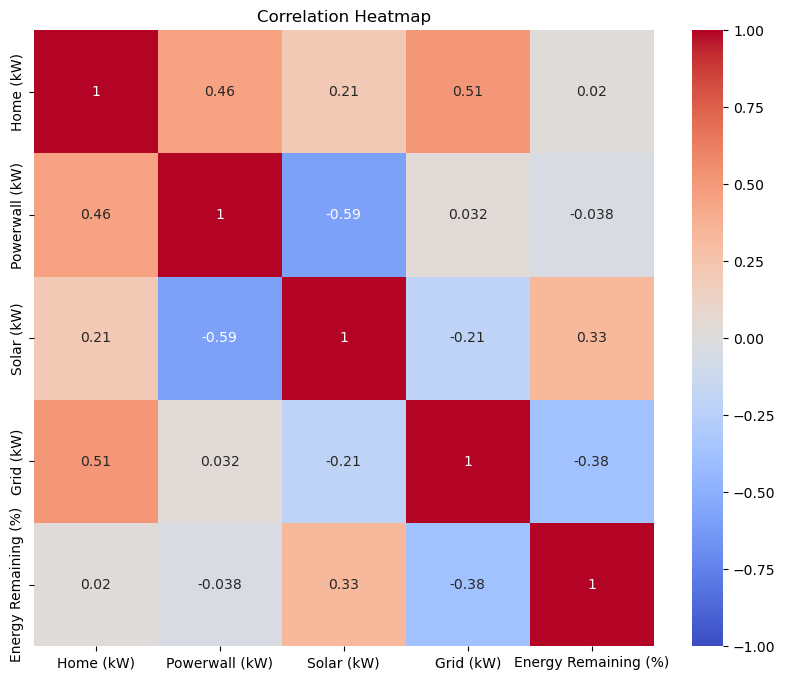

In [30]:
# Correlation Analysis
correlation_matrix = powerwall_data.corr()
print("\n")
print(PrettyText.BOLD_START + PrettyText.BLUE + "Correlation Matrix:"  + PrettyText.END)
print("\n")
print(correlation_matrix)
print("\n")

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [31]:
# Resample to daily frequency and calculate mean
powerwall_daily_summary = powerwall_data.resample('D').mean()
print("\n")
print(PrettyText.BOLD_START + PrettyText.BLUE + "Average Daily Enegy Consumption:"  + PrettyText.END)
print("\n")
print(powerwall_daily_summary.head())



Average Daily Enegy Consumption:


            Home (kW)  Powerwall (kW)  Solar (kW)  Grid (kW)  \
Date_Time                                                      
2024-07-11   0.837500       -0.235764    0.852778   0.219792   
2024-07-12   2.366319        0.079514    1.212847   1.073264   
2024-07-13   1.043056       -0.478125    1.218056   0.302431   
2024-07-14   1.439931       -0.030903    1.465972   0.000000   
2024-07-15   1.142361       -0.284375    1.423611   0.000000   

            Energy Remaining (%)  
Date_Time                         
2024-07-11             28.364583  
2024-07-12             30.041667  
2024-07-13             37.937500  
2024-07-14             51.552083  
2024-07-15             58.479167  


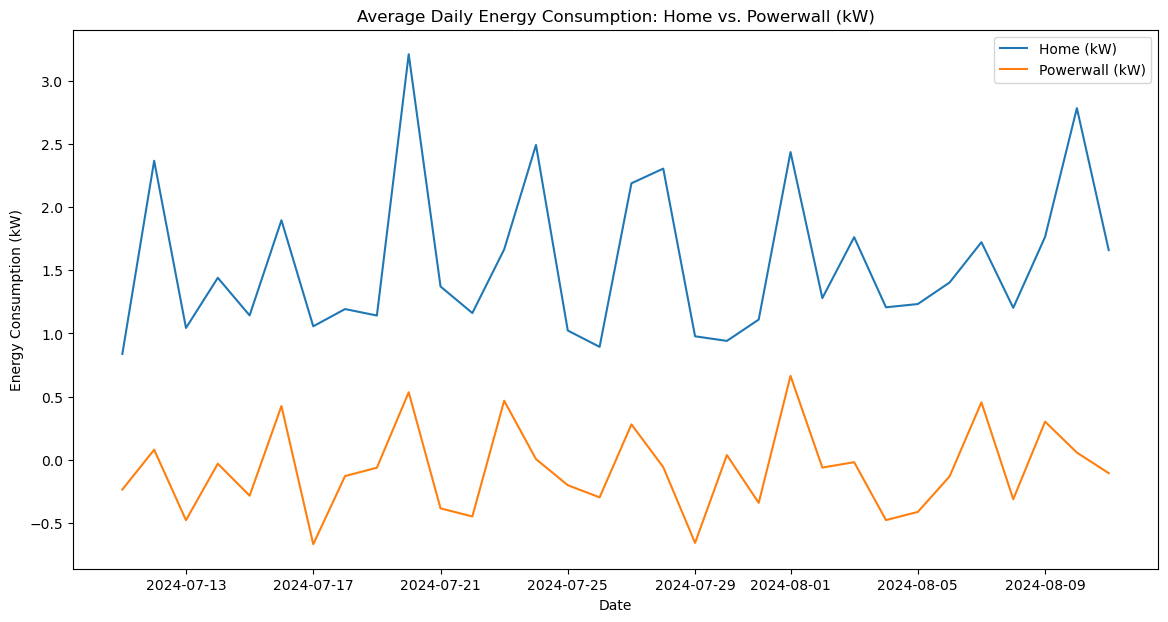

In [32]:
# Home vs. Total Powerwall Energy Consumption
plt.figure(figsize=(14, 7))
for column in powerwall_daily_summary.columns:
  if column == 'Home (kW)' or column == 'Powerwall (kW)':
    plt.plot(powerwall_daily_summary.index, powerwall_daily_summary[column], label=f'{column}')
plt.title('Average Daily Energy Consumption: Home vs. Powerwall (kW)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kW)')
plt.legend()

plt.show()

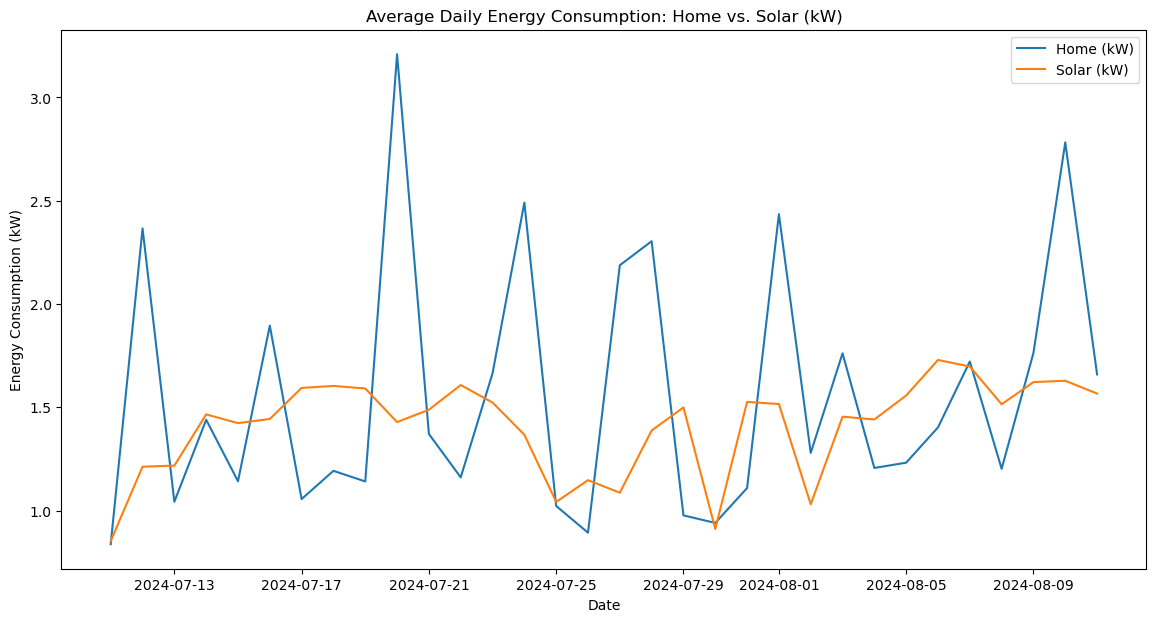

In [33]:
# Home vs. Solar Energy Consumption
plt.figure(figsize=(14, 7))
for column in powerwall_daily_summary.columns:
  if column == 'Home (kW)' or column == 'Solar (kW)':
    plt.plot(powerwall_daily_summary.index, powerwall_daily_summary[column], label=f'{column}')
plt.title('Average Daily Energy Consumption: Home vs. Solar (kW)')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (kW)')
plt.legend()

plt.show()

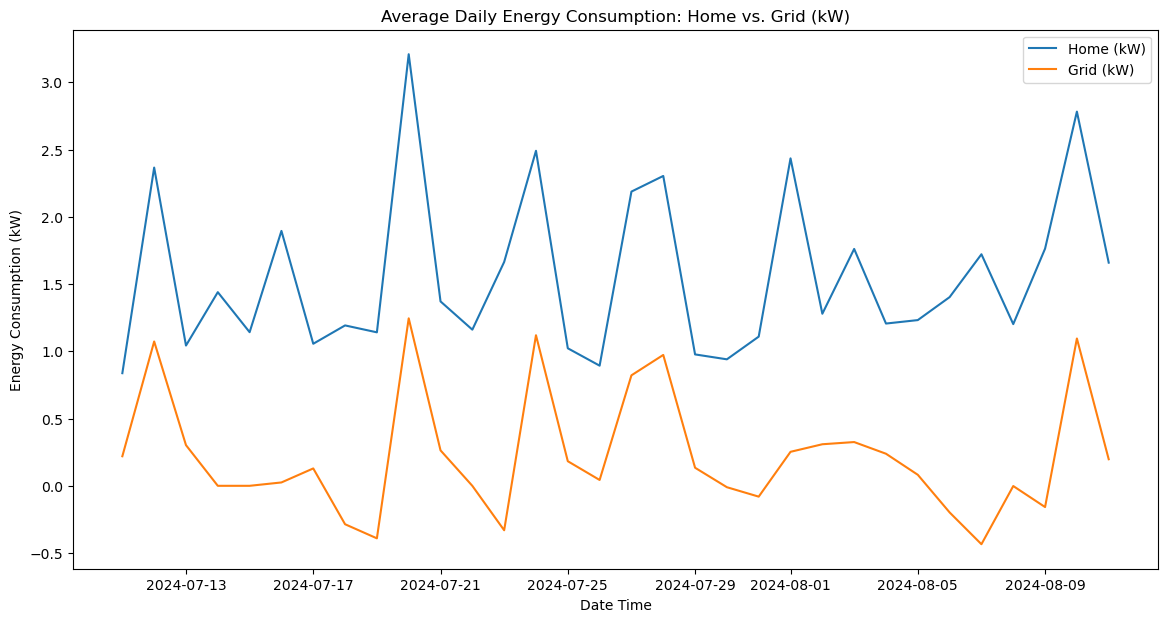

In [34]:
# Home vs. Grid Energy Consumption
plt.figure(figsize=(14, 7))
for column in powerwall_daily_summary.columns:
  if column == 'Home (kW)' or column == 'Grid (kW)':
    plt.plot(powerwall_daily_summary.index, powerwall_daily_summary[column], label=f'{column}')
plt.title('Average Daily Energy Consumption: Home vs. Grid (kW)')
plt.xlabel('Date Time')
plt.ylabel('Energy Consumption (kW)')
plt.legend()

plt.show()

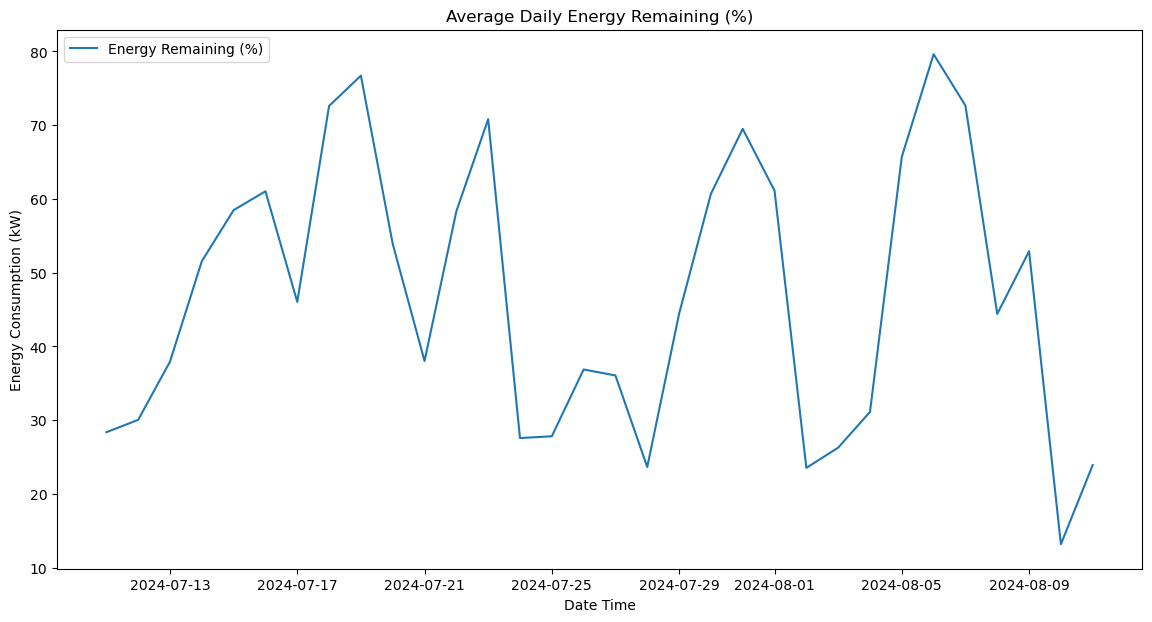

In [35]:
# Daily average of Energy Remaining
plt.figure(figsize=(14, 7))
plt.plot(powerwall_daily_summary.index, powerwall_daily_summary['Energy Remaining (%)'], label='Energy Remaining (%)')
plt.title('Average Daily Energy Remaining (%)')
plt.xlabel('Date Time')
plt.ylabel('Energy Consumption (kW)')
plt.legend()

plt.show()

The following section explores the EV Charging Data

In [37]:
# 1. Summary Statistics for ev charging data
ev_charging_summary_statistics = ev_charging_data.describe()
print("\n")
print(PrettyText.BOLD_START + PrettyText.BLUE + "Electric Vehicle Charging Data:"  + PrettyText.END)
print("\n")
print(ev_charging_summary_statistics)



Electric Vehicle Charging Data:


                        Duration     Energy      Miles       Cost  \
count                         20  20.000000   20.00000  20.000000   
mean             0 days 02:51:54  21.845340   85.20000   8.083500   
min              0 days 01:01:00   9.033600   35.00000   3.380000   
25%              0 days 01:56:30  15.291725   59.75000   5.357500   
50%              0 days 02:36:00  21.028350   82.00000   7.700000   
75%              0 days 03:09:30  25.905225  101.00000   9.930000   
max              0 days 05:53:00  39.950700  156.00000  15.130000   
std    0 days 01:25:43.445906148   8.509265   33.26544   3.313996   

                        Charging End       Charging Start  
count                             20                   20  
mean   2024-08-03 16:20:18.000000256  2024-08-03 13:28:24  
min              2024-06-15 19:12:00  2024-06-15 17:02:00  
25%              2024-07-09 01:05:15  2024-07-08 23:49:15  
50%              2024-07-22 09:07:00  2024



Correlation Matrix:


                Duration    Energy     Miles      Cost  Charging End  \
Duration        1.000000  0.901082  0.900317  0.841799      0.044618   
Energy          0.901082  1.000000  0.999971  0.968476      0.077332   
Miles           0.900317  0.999971  1.000000  0.968579      0.075941   
Cost            0.841799  0.968476  0.968579  1.000000      0.091774   
Charging End    0.044618  0.077332  0.075941  0.091774      1.000000   
Charging Start  0.043836  0.076629  0.075238  0.091118      1.000000   

                Charging Start  
Duration              0.043836  
Energy                0.076629  
Miles                 0.075238  
Cost                  0.091118  
Charging End          1.000000  
Charging Start        1.000000  




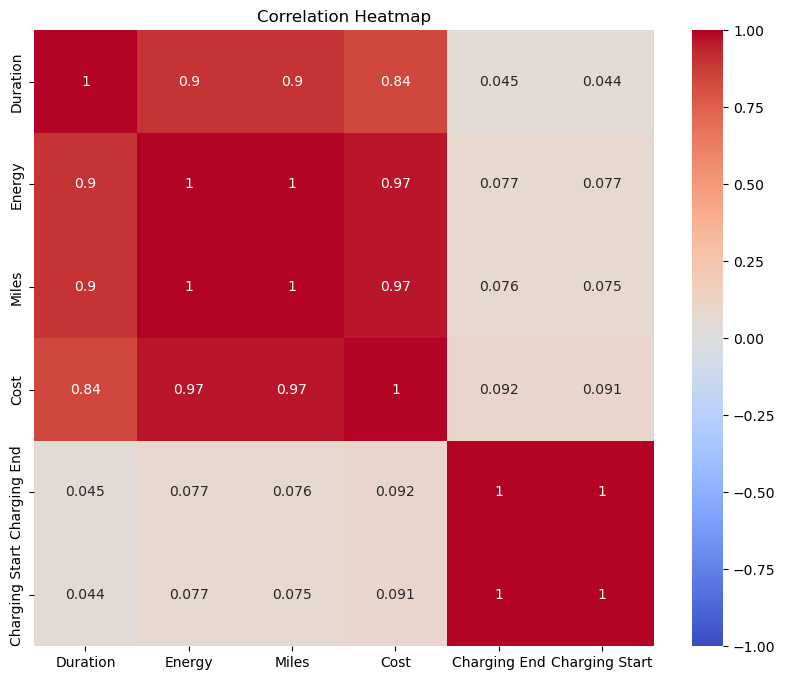

In [38]:
# Correlation Analysis
correlation_matrix = ev_charging_data.corr()
print("\n")
print(PrettyText.BOLD_START + PrettyText.BLUE + "Correlation Matrix:"  + PrettyText.END)
print("\n")
print(correlation_matrix)
print("\n")

# Plot Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [39]:
#Remove the datetime and delta columns that cannot be aggregated
columns_to_remove = ['Duration', 'Charging End', 'Charging Start']
ev_charging_data_subset = ev_charging_data.drop(columns=columns_to_remove)

ev_charging_data_subset.head(3)

,Energy,Miles,Cost
Index_Date,,,
08/10/2024 00:00,35.1108,137,13.45
08/09/2024 00:00,17.5395,68,6.71
08/07/2024 00:00,11.4924,45,4.40


In [40]:
ev_charging_data_subset.dtypes

Energy    float64
Miles       int64
Cost      float64
dtype: object

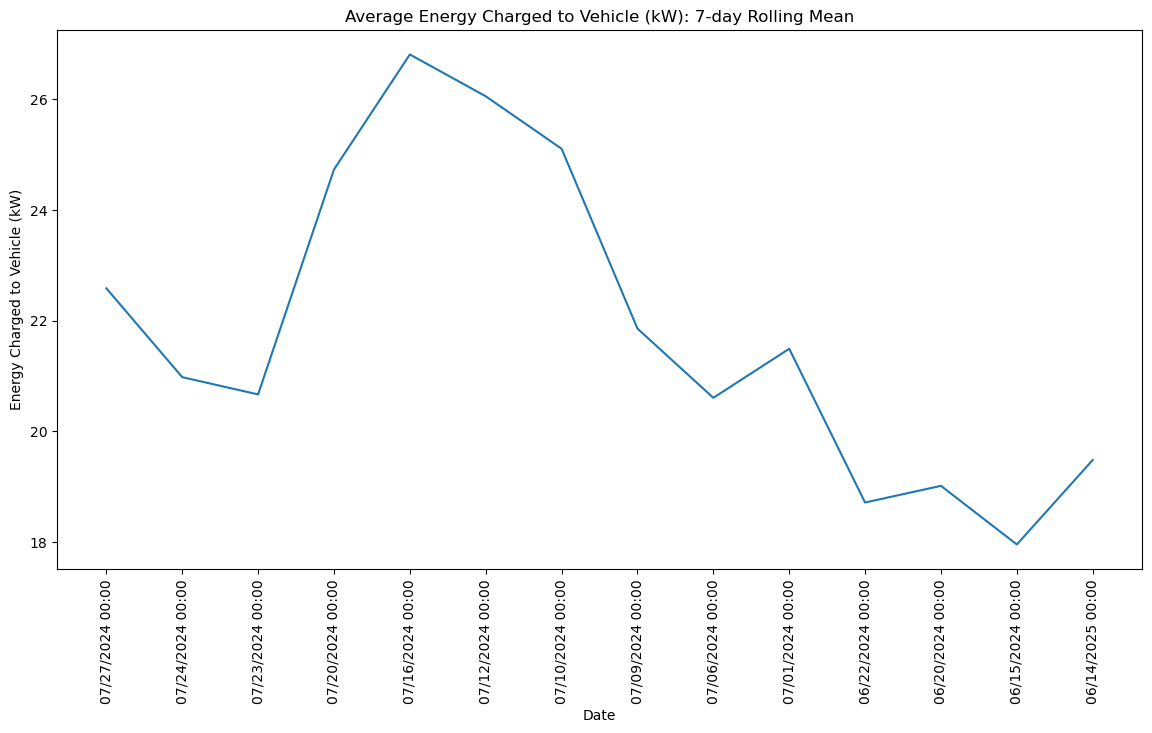

In [41]:
# Rolling Statistics


# Calculate a 7-day rolling mean for each column
rolling_means = ev_charging_data_subset.rolling(window=7).mean()
plt.figure(figsize=(14, 7))
plt.plot(rolling_means.index, rolling_means['Energy'], label=f'7-day Rolling Mean of Energy')
plt.title('Average Energy Charged to Vehicle (kW): 7-day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Energy Charged to Vehicle (kW)')
# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)
plt.show()

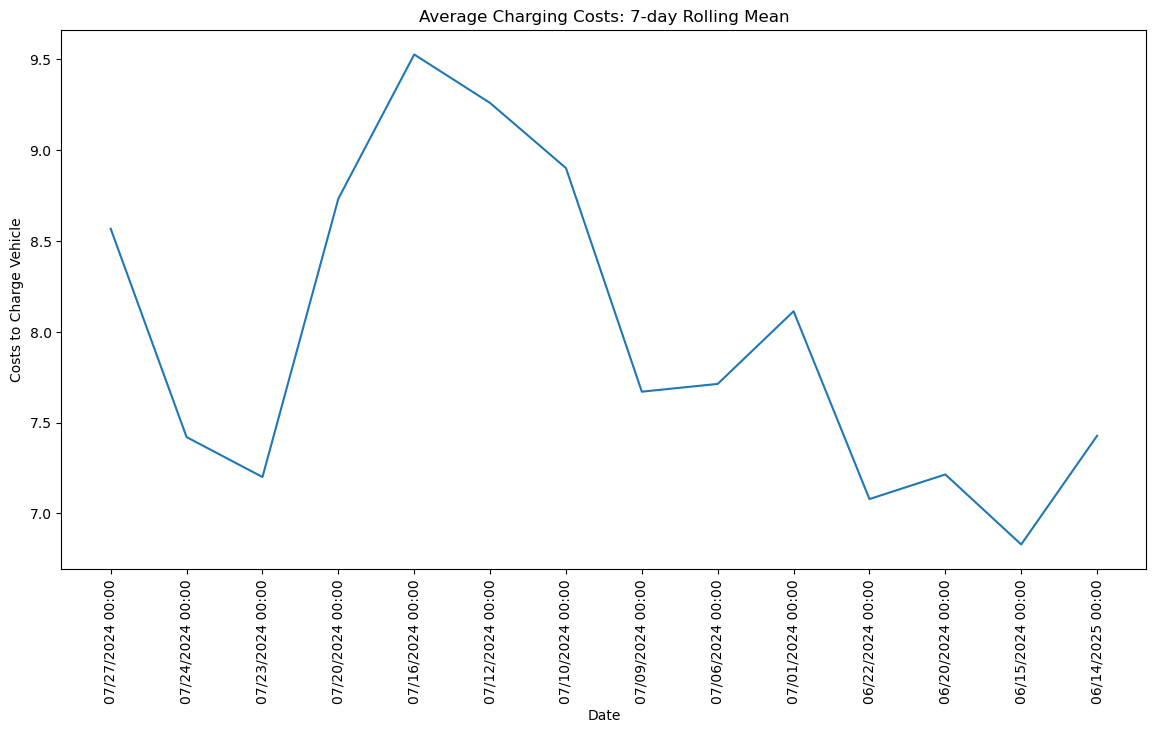

In [42]:
# Calculate a 7-day rolling mean for each column
rolling_means = ev_charging_data_subset.rolling(window=7).mean()
plt.figure(figsize=(14, 7))
plt.plot(rolling_means.index, rolling_means['Cost'], label=f'7-day Rolling Mean of Charging Costs')
plt.title('Average Charging Costs: 7-day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Costs to Charge Vehicle')
# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)
plt.show()

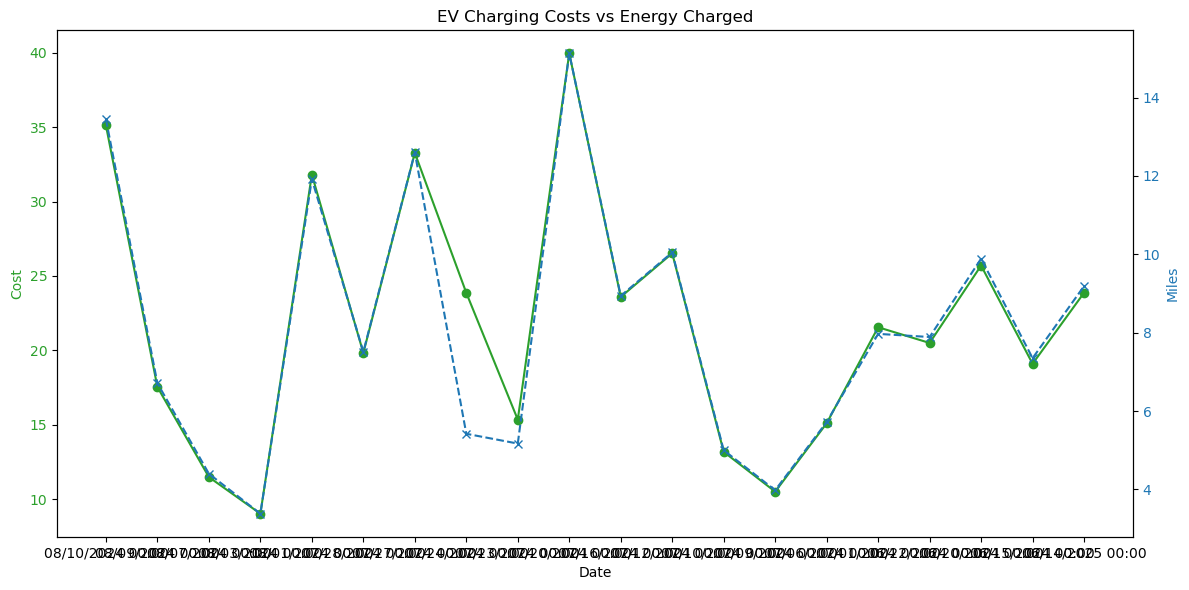

In [43]:
# plot correlated variables

# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the 'Energy' column on the primary y-axis
color = 'tab:green'
ax1.set_xlabel('Date')
ax1.set_ylabel('Cost', color=color)
ax1.plot(ev_charging_data_subset.index, ev_charging_data_subset['Energy'], color=color, marker='o', label='Energy (kW)')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Miles', color=color)
ax2.plot(ev_charging_data_subset.index, ev_charging_data_subset['Cost'], color=color, marker='x', linestyle='--', label='Cost')
ax2.tick_params(axis='y', labelcolor=color)

# Add a title and improve layout
plt.title('EV Charging Costs vs Energy Charged')
fig.tight_layout()


# Show the plot
# Rotate x-axis labels to be vertical
plt.xticks(rotation=90)
plt.show()


# **Analysis & Models**

## **Can this system go off the grid?**
## Calculate daily energy requirements and production

In [46]:
#Calculations will be done in the Kilowatt Hours unit of measure.
#the following section converts data to Kilowatt Hours
#5 min intervals - 5/60
powerwall_data = pd.read_csv(path_1)

powerwall_data['Home (kWh)'] = powerwall_data['Home (kW)']*(5/60)
powerwall_data['Powerwall (kWh)'] = powerwall_data['Powerwall (kW)']*(5/60)
powerwall_data['Solar (kWh)'] = powerwall_data['Solar (kW)']*(5/60)
powerwall_data['Grid (kWh)'] = powerwall_data['Grid (kW)']*(5/60)
powerwall_data.head()

,Date,Time,Home (kW),Powerwall (kW),Solar (kW),Grid (kW),Energy Remaining (%),Home (kWh),Powerwall (kWh),Solar (kWh),Grid (kWh)
0,8/1/2024,0:00,0.4,0.3,0.0,0.0,78,0.033333,0.025000,0.0,0.0
1,8/1/2024,0:05,0.4,0.4,0.0,0.0,78,0.033333,0.033333,0.0,0.0
2,8/1/2024,0:10,0.4,0.3,0.0,0.0,78,0.033333,0.025000,0.0,0.0
3,8/1/2024,0:15,0.3,0.3,0.0,0.0,77,0.025000,0.025000,0.0,0.0
4,8/1/2024,0:20,0.3,0.3,0.0,0.0,77,0.025000,0.025000,0.0,0.0


In [47]:
#Subset the data to focus on the data converted to Kilowatt-Hours (kWh)
#Pivot on day
data_by_day = powerwall_data.pivot_table(values = ['Home (kWh)', 'Powerwall (kWh)', 'Solar (kWh)','Grid (kWh)'], index = 'Date', aggfunc = 'sum')
#show a sample of the data_by_day data frame
data_by_day.head()

,Grid (kWh),Home (kWh),Powerwall (kWh),Solar (kWh)
Date,,,,
7/11/2024,5.275000,20.100000,-5.658333,20.466667
7/12/2024,25.758333,56.791667,1.908333,29.108333
7/13/2024,7.258333,25.033333,-11.475000,29.233333
7/14/2024,0.000000,34.558333,-0.741667,35.183333
7/15/2024,0.000000,27.416667,-6.825000,34.166667


In [48]:
ev_charging_data = pd.read_csv(path_2)

ev_charging_data.head()

,Date,EndTime,Duration,Energy,Miles,Cost
0,8/10/2024,1403,5h53m,35.1108,137,13.45
1,8/9/2024,1913,2h51m,17.5395,68,6.71
2,8/7/2024,1941,1h37m,11.4924,45,4.40
3,8/3/2024,1713,1h01m,9.0336,35,3.38
4,8/1/2024,2019,5h26m,31.8084,124,11.92


In [49]:
#add EV charging; calculate energy requirements without EV charging, surplus energy without EV charging, and the shortfall with EV
#start to answer the question: can we go off the grid?

#subset ev_charging_data to keep only the index, date and energy
EnergyOnly = ev_charging_data.drop(['EndTime','Duration', 'Miles', 'Cost'], axis =1)

#create a new dataframe combining add the EV energy charging data with the powerwall data_by_day
#merge on the Date column available in both data frames
#merge via outer join - returns all rows from both DataFrames, with missing values filled in where there are no matches.
Home_EV = pd.merge(data_by_day,
                      EnergyOnly,
                      on ='Date',
                      how ='outer')

#Copy Energy column to a new attribute named EV and fill the NA's with a 0 value
Home_EV['EV'] = Home_EV['Energy'].fillna(0)

#drop the Energy column
Home_EV = Home_EV.drop(['Energy'], axis = 1)

#calculate daily energy consumed by the home
Home_EV['wo EV'] = Home_EV['Home (kWh)'] - Home_EV['EV']

#calculate the execess solar when only powering the home
Home_EV['Excess no EV'] = Home_EV['Solar (kWh)'] - Home_EV['wo EV']

#calculate the shortfall in energy when EV is charging.
Home_EV['Shortfall with EV'] = Home_EV['Solar (kWh)'] - Home_EV['Home (kWh)']

#for later use
Home_EV2 = Home_EV
Home_EV2.head()

,Date,Grid (kWh),Home (kWh),Powerwall (kWh),Solar (kWh),EV,wo EV,Excess no EV,Shortfall with EV
0,6/14/2025,NaN,NaN,NaN,NaN,23.8749,NaN,NaN,NaN
1,6/15/2024,NaN,NaN,NaN,NaN,19.1017,NaN,NaN,NaN
2,6/20/2024,NaN,NaN,NaN,NaN,25.7002,NaN,NaN,NaN
3,6/22/2024,NaN,NaN,NaN,NaN,20.5005,NaN,NaN,NaN
4,7/1/2024,NaN,NaN,NaN,NaN,21.5562,NaN,NaN,NaN


In [50]:
#pivot long for boxplots: requirements with and without EV and surplus/shortfalls with and without EV
forboxplot = Home_EV.drop(['Grid (kWh)', 'Home (kWh)', 'Powerwall (kWh)', 'Solar (kWh)', 'EV', 'wo EV'], axis = 1)
forboxplot
forboxplot = pd.melt(forboxplot, id_vars='Date', value_vars=['Excess no EV', 'Shortfall with EV'])
forboxplot.head()


,Date,variable,value
0,6/14/2025,Excess no EV,NaN
1,6/15/2024,Excess no EV,NaN
2,6/20/2024,Excess no EV,NaN
3,6/22/2024,Excess no EV,NaN
4,7/1/2024,Excess no EV,NaN


In [51]:
forboxplot2 = Home_EV.drop(['Grid (kWh)', 'Powerwall (kWh)', 'Solar (kWh)', 'Excess no EV', 'EV','Shortfall with EV'], axis = 1)
forboxplot2
forboxplot2 = pd.melt(forboxplot2, id_vars='Date', value_vars=['Home (kWh)', 'wo EV'])
forboxplot2.head()

,Date,variable,value
0,6/14/2025,Home (kWh),NaN
1,6/15/2024,Home (kWh),NaN
2,6/20/2024,Home (kWh),NaN
3,6/22/2024,Home (kWh),NaN
4,7/1/2024,Home (kWh),NaN


<Axes: xlabel='variable', ylabel='value'>

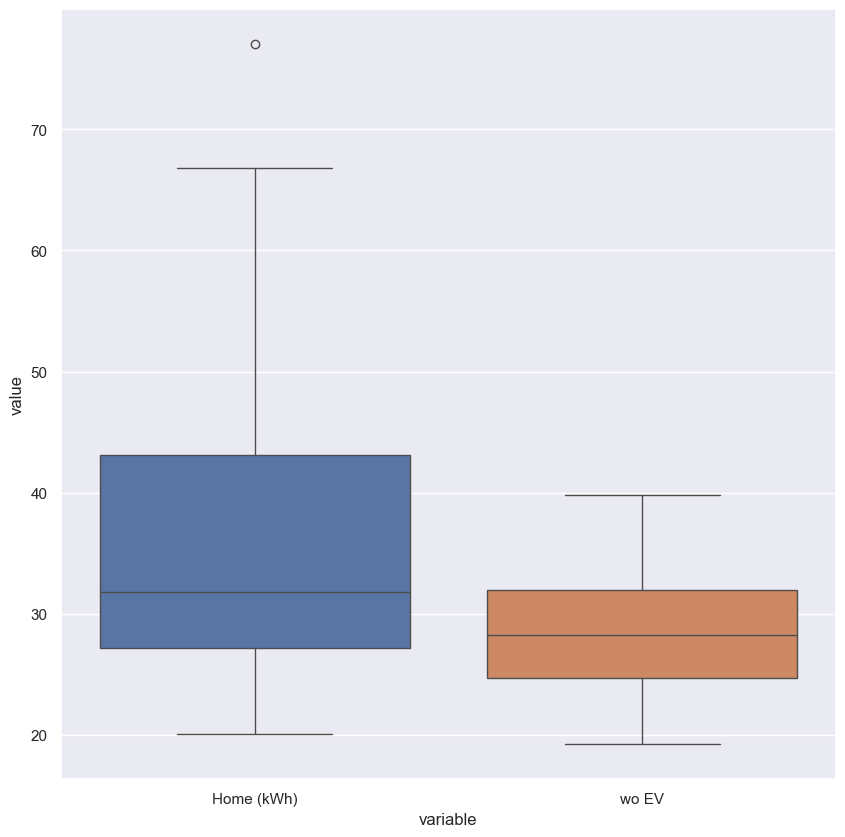

In [52]:
#Usage boxPlot
sns.set(rc={"figure.figsize":(10, 10)})
sns.boxplot(data=forboxplot2, x="variable", y="value", hue="variable")

<Axes: xlabel='variable', ylabel='value'>

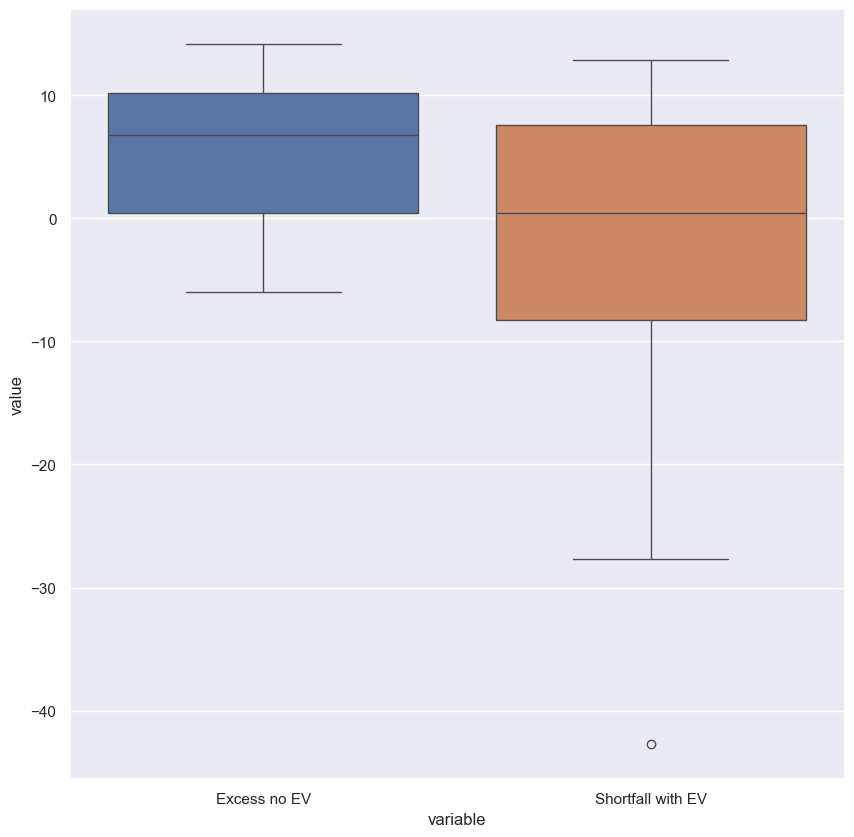

In [53]:
#BoxPlot showing daily energy surplus and shortfall
# 0 means we have just enough capacity; less than zero is a requirement from the battery or grid
sns.boxplot(data=forboxplot, x="variable", y="value", hue="variable")

## Calculate battery requirements
### Battery should be set to fall no lower than 20% to ensure backup power is available
  

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

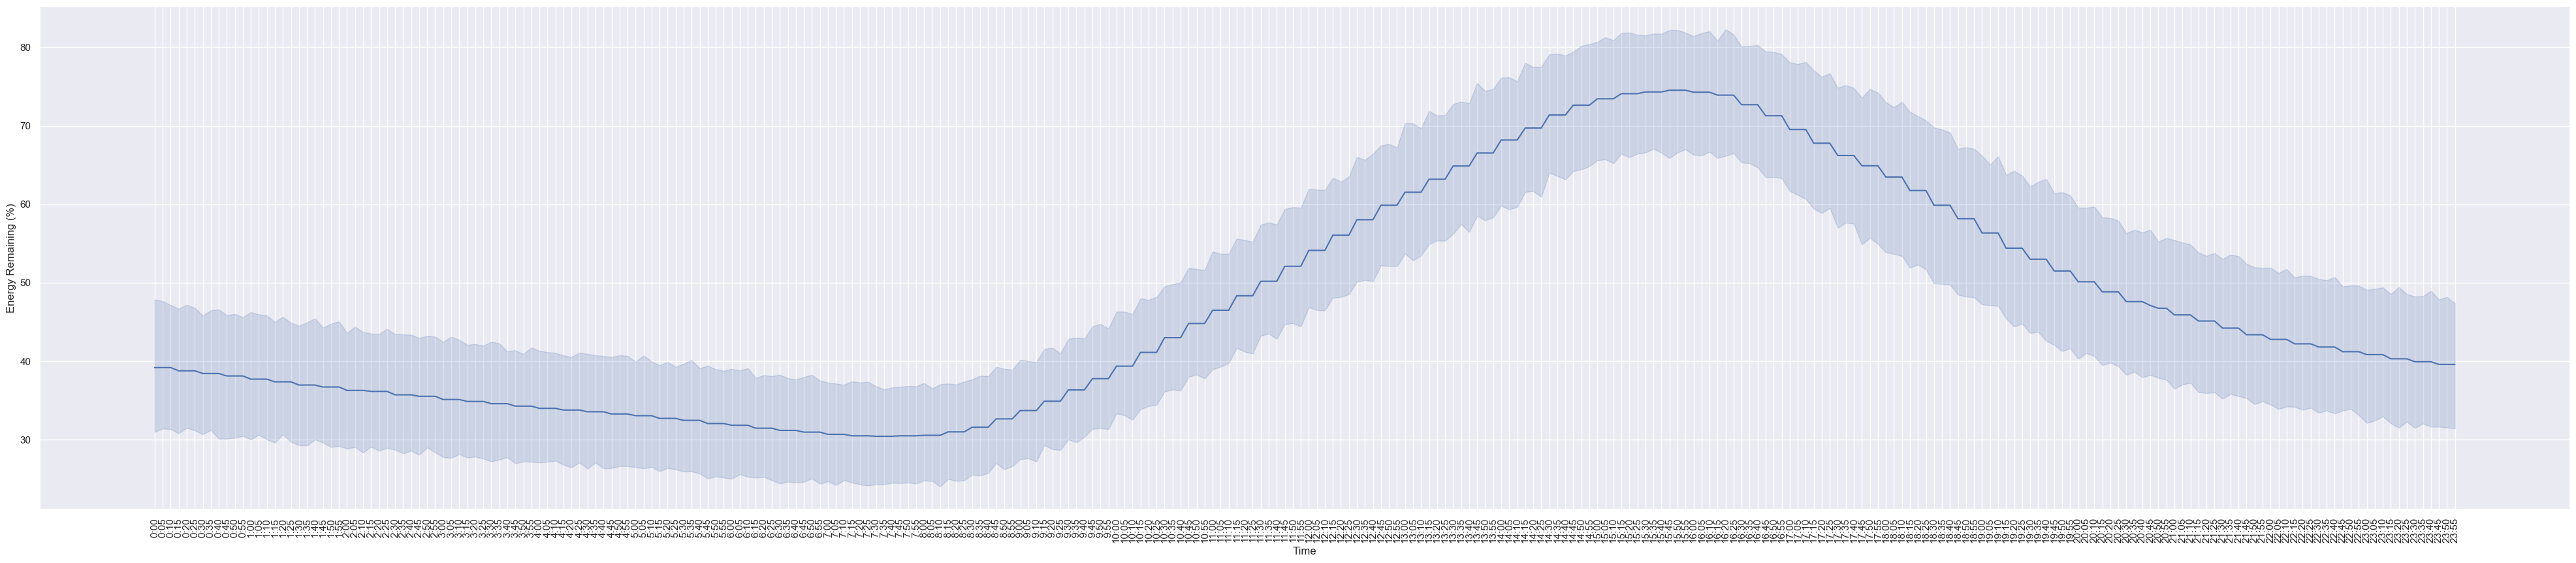

In [55]:
sns.set(rc={"figure.figsize":(50, 10)})
sns.lineplot(x="Time", y="Energy Remaining (%)",
             data=(powerwall_data))
plt.xticks(rotation=90)


<Axes: xlabel='Date', ylabel='Energy Remaining (%)'>

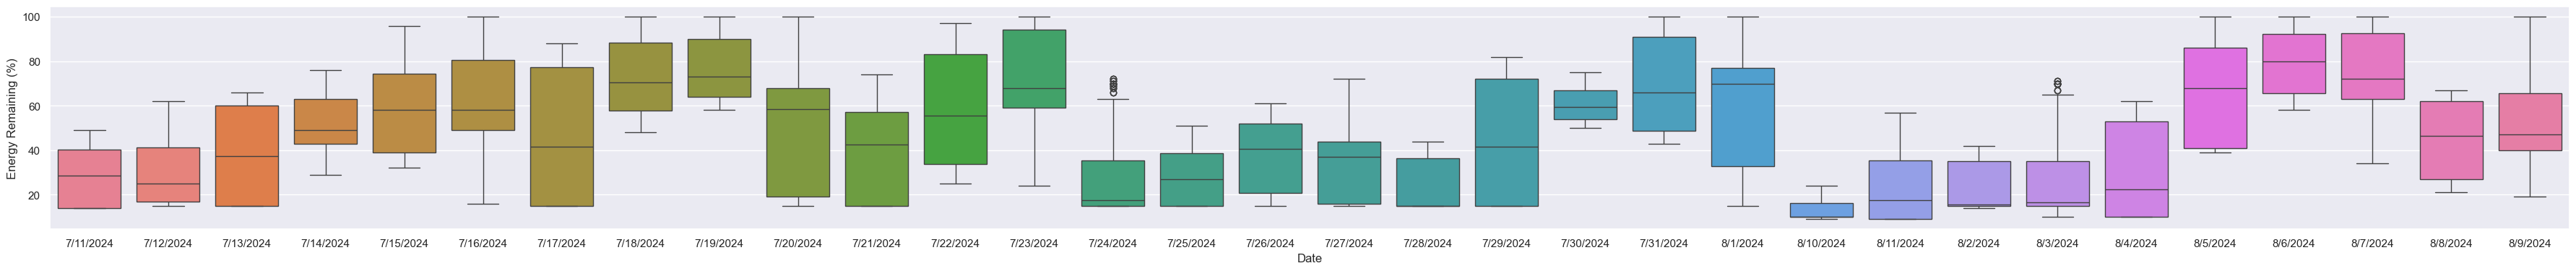

In [56]:
#energy remaining by day

sns.set(rc={"figure.figsize":(45, 4)})
powerwall_data = powerwall_data.sort_values(by = 'Date')
sns.boxplot(data=powerwall_data, x="Date", y="Energy Remaining (%)", hue = "Date")


<Axes: xlabel='Date', ylabel='value'>

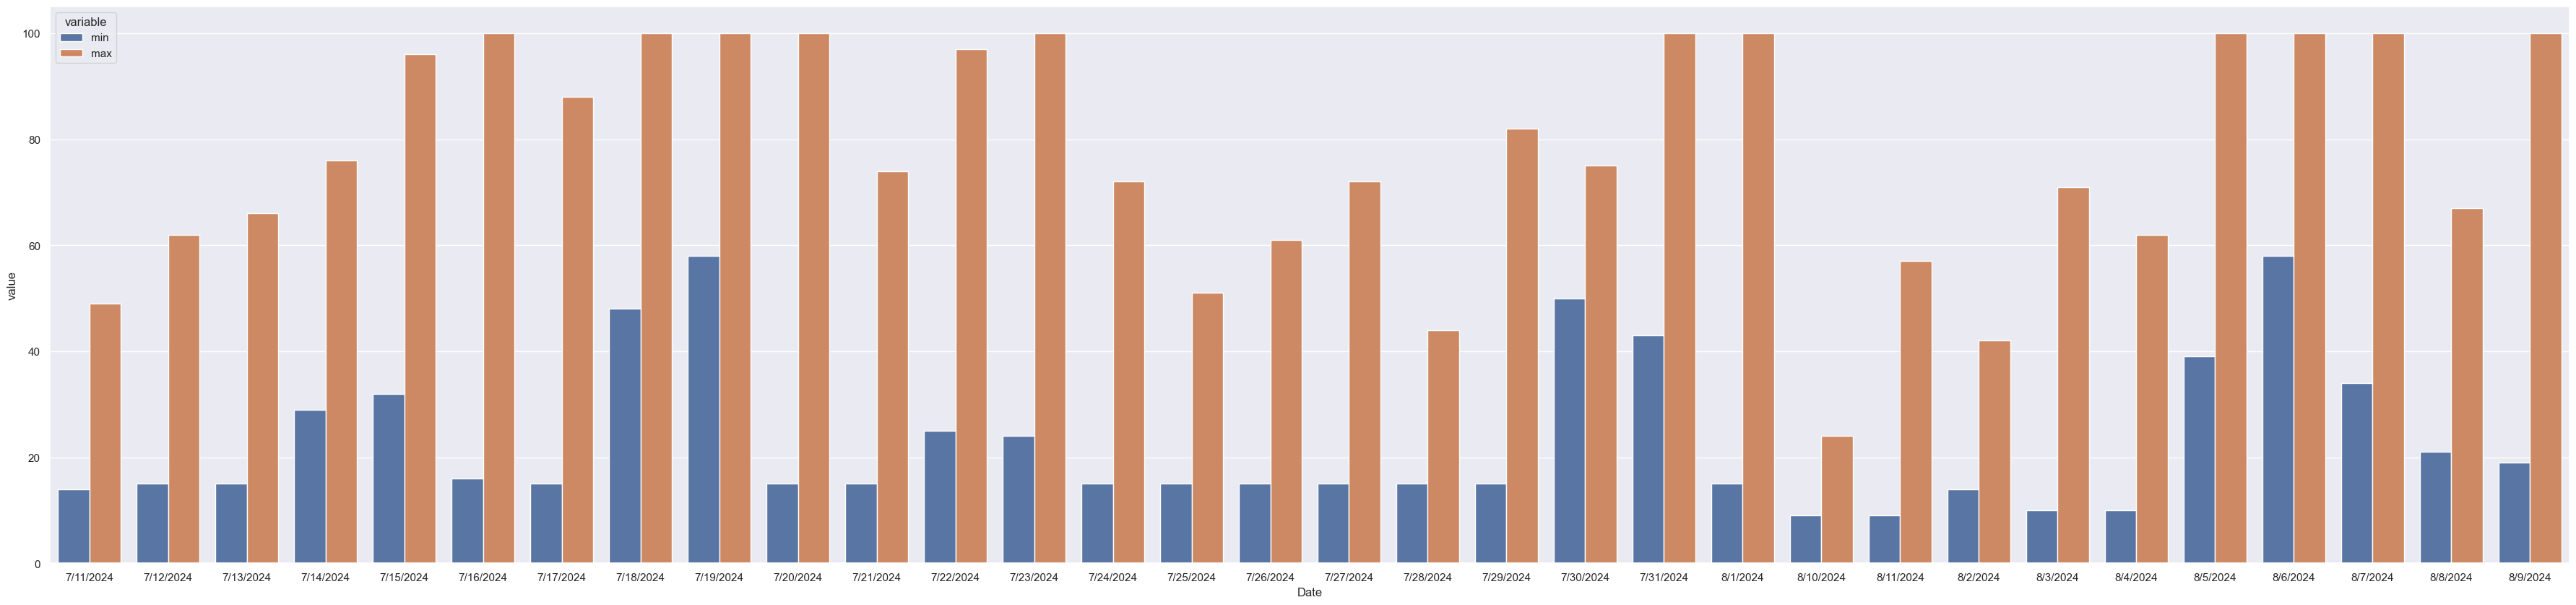

In [57]:
#unable to determine how much battery is needed due to back up battery requirement; will use median
minmaxbattery = powerwall_data.pivot_table(values = 'Energy Remaining (%)', index = 'Date', aggfunc = ['min', 'max'])
minmaxbattery = minmaxbattery.reset_index()
minmaxbattery.columns= ['Date', 'min', 'max']
minmaxbattery2 = pd.melt(minmaxbattery, id_vars='Date', value_vars=['min', 'max'])
sns.set(rc={"figure.figsize":(45, 10)})
sns.barplot(data=minmaxbattery2, x="Date", y="value", hue="variable")

In [58]:
#battery descriptive statistics; all in percent available;
#will use the median for analysis

minMin = min(minmaxbattery['min'])
maxMin = max(minmaxbattery['min'])
minMax = min(minmaxbattery['max'])
maxMax = max(minmaxbattery['max']) #100
medianMin = statistics.median(minmaxbattery['min'])
medianMax = statistics.median(minmaxbattery['max'])
meanMin = statistics.mean(minmaxbattery['min'])
meanMax = statistics.mean(minmaxbattery['max'])
modeMin = statistics.mode(minmaxbattery['min'])
modeMax = statistics.mode(minmaxbattery['max'])

print("median Min: ", medianMin)

print("median Max: ",medianMax)

print("median delta: ",medianMax-medianMin)


median Min:  15.0
median Max:  75.5
median delta:  60.5


<Axes: xlabel='Date', ylabel='value'>

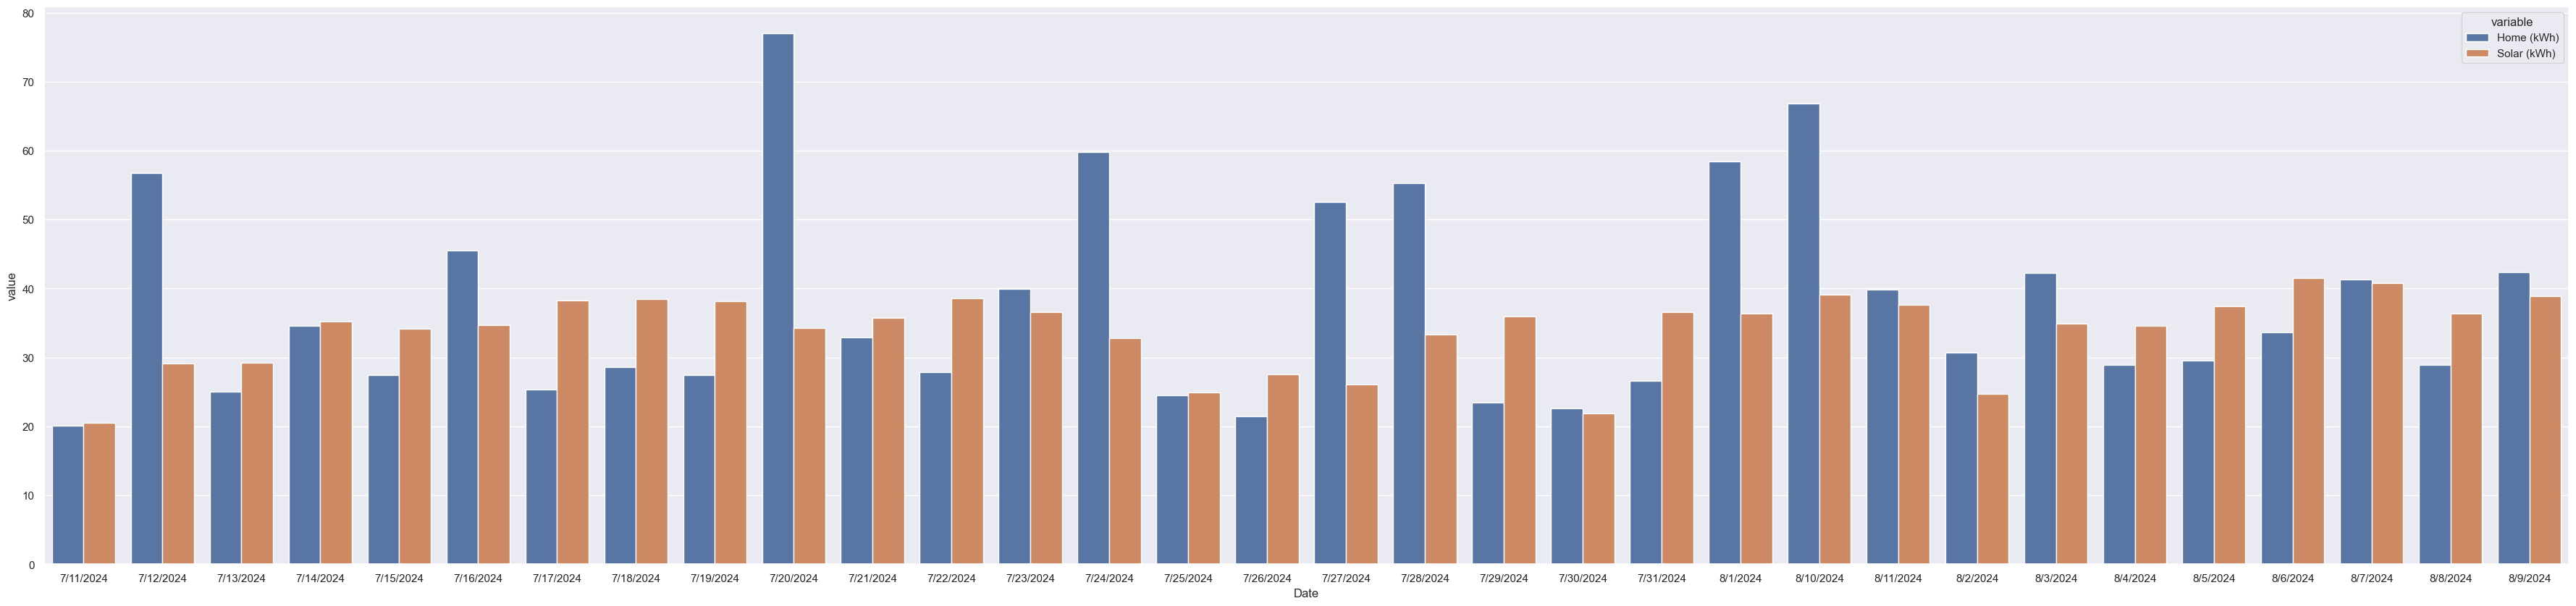

In [59]:
#usage vs. production

home_EVforplot = Home_EV.drop(['Excess no EV', 'EV','Shortfall with EV', 'wo EV'], axis = 1)

#home_EVforplot = home_EVforplot.drop(["7/10/2024", "7/9/2024", "7/6/2024", "6/22/2024", "6/22/2024","6/20/2024", "6/15/2024", "6/14/2025"], axis = 0, inplace = True)
baddates = ["7/10/2024", "7/9/2024", "7/6/2024", "6/22/2024", "6/22/2024","6/20/2024", "6/15/2024", "6/14/2025", "7/1/2024"]
home_EVforplot = home_EVforplot[~home_EVforplot['Date'].isin(baddates)]
home_EVforplot = pd.melt(home_EVforplot, id_vars='Date', value_vars=['Home (kWh)', 'Solar (kWh)'])
sns.set(rc={"figure.figsize":(45, 10)})
sns.barplot(data=home_EVforplot, x="Date", y="value", hue="variable")

In [60]:
import statistics
Home_EV.head()
medianusage = statistics.median(Home_EV['Home (kWh)'])
print('typical (median) usage is ',"{:.2f}".format(medianusage),'kWh')
mediansolar = statistics.median(Home_EV['Solar (kWh)'])
delta = medianusage - mediansolar
print('typical (median) solar production is ',"{:.2f}".format(mediansolar),'kWh')
print('typical (median) daily shortfall is ',"{:.2f}".format(delta),'kWh')

typical (median) usage is  29.27 kWh
typical (median) solar production is  34.78 kWh
typical (median) daily shortfall is  -5.52 kWh


In [61]:
#filter on days with 0 grid usage- 12 days, 3 with EV
NoGrid = Home_EV[(Home_EV['Grid (kWh)'] <= 0.0)]
NoGrid

,Date,Grid (kWh),Home (kWh),Powerwall (kWh),Solar (kWh),EV,wo EV,Excess no EV,Shortfall with EV
9,7/14/2024,0.000000,34.558333,-0.741667,35.183333,0.0000,34.558333,0.625000,0.625000
10,7/15/2024,0.000000,27.416667,-6.825000,34.166667,0.0000,27.416667,6.750000,6.750000
13,7/18/2024,-6.858333,28.625000,-3.091667,38.491667,0.0000,28.625000,9.866667,9.866667
14,7/19/2024,-9.375000,27.391667,-1.516667,38.191667,0.0000,27.391667,10.800000,10.800000
17,7/22/2024,-0.008333,27.866667,-10.775000,38.591667,0.0000,27.866667,10.725000,10.725000
18,7/23/2024,-7.933333,39.950000,11.216667,36.558333,15.3534,24.596600,11.961733,-3.391667
25,7/30/2024,-0.250000,22.575000,0.891667,21.875000,0.0000,22.575000,-0.700000,-0.700000
26,7/31/2024,-1.933333,26.625000,-8.183333,36.625000,0.0000,26.625000,10.000000,10.000000
36,8/6/2024,-4.750000,33.675000,-3.150000,41.508333,0.0000,33.675000,7.833333,7.833333
37,8/7/2024,-10.425000,41.325000,10.908333,40.741667,11.4924,29.832600,10.909067,-0.583333


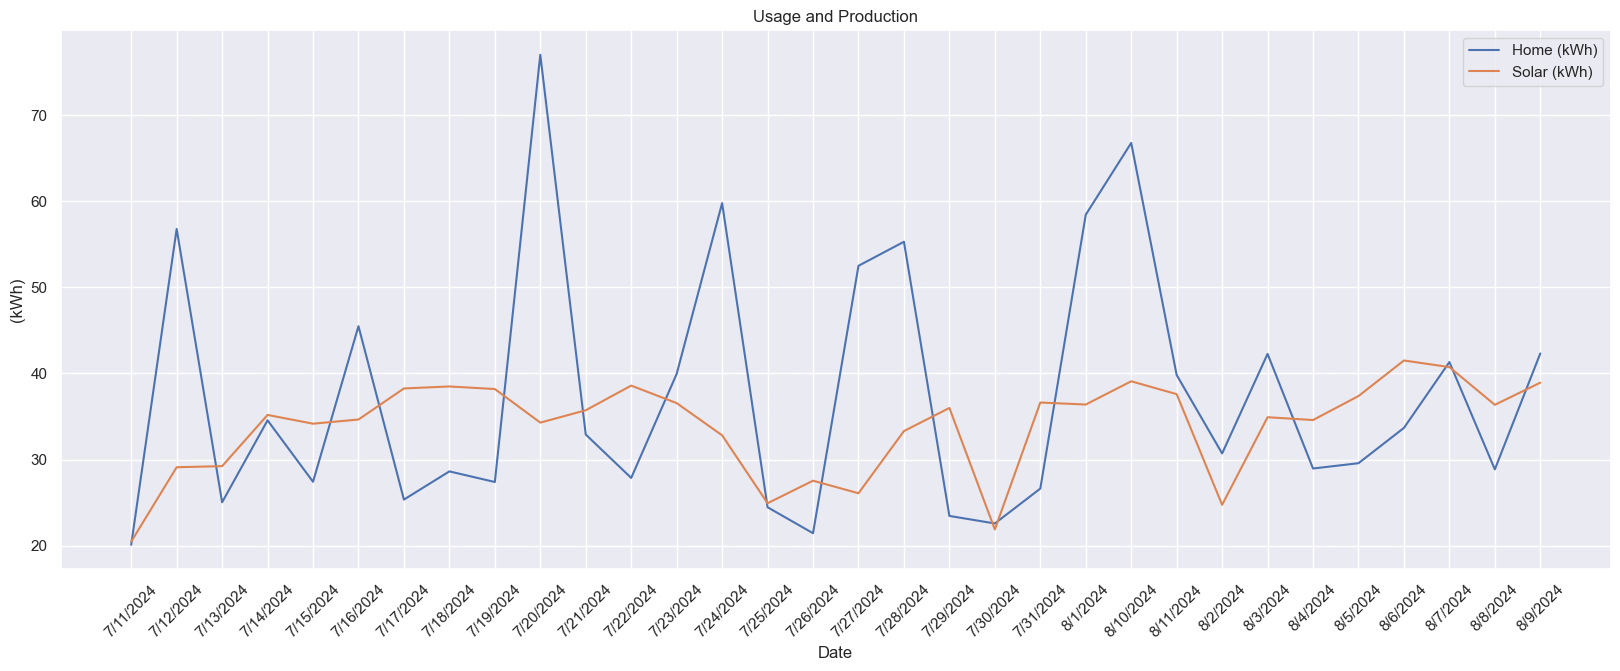

In [62]:
plt.figure(figsize=(20, 7))
for column in data_by_day.columns:
  if column == 'Home (kWh)' or column == 'Solar (kWh)':
    plt.plot(data_by_day.index, data_by_day[column], label=f'{column}')
plt.title('Usage and Production')
plt.xlabel('Date')
plt.ylabel('(kWh)')
# Rotate x-axis labels to be vertical
plt.xticks(rotation=45)
plt.legend()

plt.show()

# **Models - Linear Regression**

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_solar = powerwall_data[['Solar (kW)']]
X_grid = powerwall_data[['Grid (kW)']]
X_powerwall = powerwall_data[['Powerwall (kW)']]

# Target variable (dependent variable)
y = powerwall_data['Home (kW)']

# Solar model
model_solar = LinearRegression()
model_solar.fit(X_solar, y)
y_solar_pred = model_solar.predict(X_solar)
r2_solar = r2_score(y, y_solar_pred)
mse_solar = mean_squared_error(y, y_solar_pred)

print("Solar Model:")
print("Coefficient:", model_solar.coef_)
print("Intercept:", model_solar.intercept_)
print("R-squared for Solar:", r2_solar)
print("Mean Squared Error for Solar:", mse_solar)
print("Actual vs Predicted for Solar:\n", pd.DataFrame({'Actual': y, 'Predicted': y_solar_pred}).head())

# Grid model
model_grid = LinearRegression()
model_grid.fit(X_grid, y)
y_grid_pred = model_grid.predict(X_grid)
r2_grid = r2_score(y, y_grid_pred)
mse_grid = mean_squared_error(y, y_grid_pred)

print("\nGrid Model:")
print("Coefficient:", model_grid.coef_)
print("Intercept:", model_grid.intercept_)
print("R-squared for Grid:", r2_grid)
print("Mean Squared Error for Grid:", mse_grid)
print("Actual vs Predicted for Grid:\n", pd.DataFrame({'Actual': y, 'Predicted': y_grid_pred}).head())

# Powerwall model
model_powerwall = LinearRegression()
model_powerwall.fit(X_powerwall, y)
y_powerwall_pred = model_powerwall.predict(X_powerwall)
r2_powerwall = r2_score(y, y_powerwall_pred)
mse_powerwall = mean_squared_error(y, y_powerwall_pred)

print("\nPowerwall Model:")
print("Coefficient:", model_powerwall.coef_)
print("Intercept:", model_powerwall.intercept_)
print("R-squared for Powerwall:", r2_powerwall)
print("Mean Squared Error for Powerwall:", mse_powerwall)
print("Actual vs Predicted for Powerwall:\n", pd.DataFrame({'Actual': y, 'Predicted': y_powerwall_pred}).head())

Solar Model:
Coefficient: [0.22594653]
Intercept: 1.240247832415347
R-squared for Solar: 0.04525417004708221
Mean Squared Error for Solar: 3.882609013270133
Actual vs Predicted for Solar:
       Actual  Predicted
3383     1.1   1.443600
3363     0.4   1.601762
3362     0.4   1.421005
3361     0.5   1.421005
3360     1.0   1.398410

Grid Model:
Coefficient: [0.75720253]
Intercept: 1.390236734401903
R-squared for Grid: 0.2609514289054181
Mean Squared Error for Grid: 3.005445589134167
Actual vs Predicted for Grid:
       Actual  Predicted
3383     1.1   1.390237
3363     0.4   1.390237
3362     0.4   1.390237
3361     0.5   1.390237
3360     1.0   1.390237

Powerwall Model:
Coefficient: [0.46141866]
Intercept: 1.5952617497552444
R-squared for Powerwall: 0.20971714832815447
Mean Squared Error for Powerwall: 3.2137970407110794
Actual vs Predicted for Powerwall:
       Actual  Predicted
3383     1.1   1.641404
3363     0.4   1.041559
3362     0.4   1.410694
3361     0.5   1.456836
3360     1

# **ROI CALCULATIONS**

---



***Rate References***

First, retrieve the cost & sell-back (export) rate conversions.

In [67]:
#Store the cost rates for later calculation
overnight_export_rate = usage_export_rates_data.iloc[0,1]
daytime_export_rate = usage_export_rates_data.iloc[0,2]
peak_export_rate = usage_export_rates_data.iloc[0,3]
flat_rate_august = usage_export_rates_data.iloc[1,1]
flat_rate_july = usage_export_rates_data.iloc[2,1]
flat_rate_blended = round((flat_rate_august + flat_rate_july) / 2,4)

print("overnight_export_rate (9pm - 9am) = ", overnight_export_rate)
print("daytime_export_rate (9am - 5pm) = ", daytime_export_rate)
print("peak_export_rate (5pm - 9pm) = ", peak_export_rate)
print("flat_rate_august = ", flat_rate_august)
print("flat_rate_july = ", flat_rate_july)
print("flat_rate_blended = ", flat_rate_blended)

overnight_export_rate (9pm - 9am) =  18.9
daytime_export_rate (9am - 5pm) =  13.5
peak_export_rate (5pm - 9pm) =  32.9
flat_rate_august =  39.7562
flat_rate_july =  39.3382
flat_rate_blended =  39.5472


The following function takes the date and one energy attribute and calculates the cost of the energy based upon the monthly flat rate for the month associated with the date.

In [69]:
#function to calculate energy costs
def calculateEnergyCosts(date_str, grid_value, sign):
    # Parse the date string into a datetime object
    date_obj = datetime.strptime(date_str, '%m/%d/%Y')
    # Extract the month
    month = date_obj.month

    if grid_value > 0:
      if month == 7:
        energy_cost = (flat_rate_july * grid_value)/100
      elif month == 8:
        energy_cost = (flat_rate_august * grid_value)/100
      else:
        energy_cost = (flat_rate_blended * grid_value)/100
    else:
      energy_cost = 0

    if sign == 'negative':
      energy_cost = energy_cost * -1

    #round to two decimals for currency
    return round(energy_cost,2)

***Attribute: Cost***

Call the function to add the value of the energy cost for each row in the data frame. Energy costs are reported as a negative number indicating costs out.

In [72]:
# Apply the calculateExportValue function to each row
powerwall_data['Cost'] = powerwall_data.apply(
    lambda row: calculateEnergyCosts(row['Date'], row['Grid (kWh)'],'negative'),
    axis=1
)

Show a sample of the datafrmae with the Cost attribute added:

In [74]:
#show a sample set of records showing the value of Energy Costs
powerwall_data[powerwall_data['Cost'] < 0].head(10)

,Date,Time,Home (kW),Powerwall (kW),Solar (kW),Grid (kW),Energy Remaining (%),Home (kWh),Powerwall (kWh),Solar (kWh),Grid (kWh),Cost
3218,7/11/2024,4:10,0.4,0.0,0.0,0.4,14,0.033333,0.0,0.0,0.033333,-0.01
3217,7/11/2024,4:05,0.4,0.0,0.0,0.4,14,0.033333,0.0,0.0,0.033333,-0.01
3216,7/11/2024,4:00,0.4,0.0,0.0,0.4,14,0.033333,0.0,0.0,0.033333,-0.01
3215,7/11/2024,3:55,0.4,0.0,0.0,0.4,14,0.033333,0.0,0.0,0.033333,-0.01
3214,7/11/2024,3:50,0.4,0.0,0.0,0.4,14,0.033333,0.0,0.0,0.033333,-0.01
3213,7/11/2024,3:45,1.0,0.0,0.0,1.0,14,0.083333,0.0,0.0,0.083333,-0.03
3219,7/11/2024,4:15,0.4,0.0,0.0,0.4,14,0.033333,0.0,0.0,0.033333,-0.01
3212,7/11/2024,3:40,1.3,0.0,0.0,1.3,14,0.108333,0.0,0.0,0.108333,-0.04
3210,7/11/2024,3:30,0.7,0.0,0.0,0.7,14,0.058333,0.0,0.0,0.058333,-0.02
3209,7/11/2024,3:25,0.4,0.0,0.0,0.4,14,0.033333,0.0,0.0,0.033333,-0.01


Show the sum total of the Cost attribute:

In [76]:
energy_costs_total = float(powerwall_data['Cost'].sum())

print("Cost = ", f"${energy_costs_total:,.2f}")


Cost =  $-91.99


***Attribute: Production***

Call the function to add the value of the energy produced from solar into each row of the data frame. Production is reported as positive to indicate value in.

In [79]:
# Apply the calculateExportValue function to each row
powerwall_data['Production'] = powerwall_data.apply(
    lambda row: calculateEnergyCosts(row['Date'], row['Solar (kWh)'],'positive'),
    axis=1
)

Show a sample of the dataframe with the Production attribute added:

In [81]:
powerwall_data[powerwall_data['Production'] > 0].head(10)

,Date,Time,Home (kW),Powerwall (kW),Solar (kW),Grid (kW),Energy Remaining (%),Home (kWh),Powerwall (kWh),Solar (kWh),Grid (kWh),Cost,Production
3383,7/11/2024,17:55,1.1,0.1,0.9,0.0,49,0.091667,0.008333,0.075000,0.0,0.0,0.03
3363,7/11/2024,16:15,0.4,-1.2,1.6,0.0,49,0.033333,-0.100000,0.133333,0.0,0.0,0.05
3362,7/11/2024,16:10,0.4,-0.4,0.8,0.0,47,0.033333,-0.033333,0.066667,0.0,0.0,0.03
3361,7/11/2024,16:05,0.5,-0.3,0.8,0.0,47,0.041667,-0.025000,0.066667,0.0,0.0,0.03
3360,7/11/2024,16:00,1.0,0.4,0.7,0.0,47,0.083333,0.033333,0.058333,0.0,0.0,0.02
3359,7/11/2024,15:55,1.4,0.6,0.8,0.0,47,0.116667,0.050000,0.066667,0.0,0.0,0.03
3358,7/11/2024,15:50,0.7,-0.9,1.6,0.0,47,0.058333,-0.075000,0.133333,0.0,0.0,0.05
3364,7/11/2024,16:20,0.4,-1.9,2.3,0.0,49,0.033333,-0.158333,0.191667,0.0,0.0,0.08
3357,7/11/2024,15:45,0.6,-0.7,1.3,0.0,47,0.050000,-0.058333,0.108333,0.0,0.0,0.04
3355,7/11/2024,15:35,0.7,-1.8,2.5,0.0,47,0.058333,-0.150000,0.208333,0.0,0.0,0.08


Show the sum total of the Production attribute:

In [83]:
energy_costs_total = float(powerwall_data['Production'].sum())

print("Production = ", f"${energy_costs_total:,.2f}")

Production =  $429.10


***Attribute: Value of Consumed Power***

Call the function to add the value of the consumed power into each row of the data frame.  Reported as positive.


In [86]:
# Apply the calculateExportValue function to each row
powerwall_data['ValueOfConsumedPower'] = powerwall_data.apply(
    lambda row: calculateEnergyCosts(row['Date'], row['Home (kWh)'],'positive'),
    axis=1
)


Show a sample of the data frame with the Value of Consumed Power attribute added:

In [88]:
powerwall_data[powerwall_data['ValueOfConsumedPower'] > 0].head(10)

,Date,Time,Home (kW),Powerwall (kW),Solar (kW),Grid (kW),Energy Remaining (%),Home (kWh),Powerwall (kWh),Solar (kWh),Grid (kWh),Cost,Production,ValueOfConsumedPower
3383,7/11/2024,17:55,1.1,0.1,0.9,0.0,49,0.091667,0.008333,0.075000,0.0,0.0,0.03,0.04
3363,7/11/2024,16:15,0.4,-1.2,1.6,0.0,49,0.033333,-0.100000,0.133333,0.0,0.0,0.05,0.01
3362,7/11/2024,16:10,0.4,-0.4,0.8,0.0,47,0.033333,-0.033333,0.066667,0.0,0.0,0.03,0.01
3361,7/11/2024,16:05,0.5,-0.3,0.8,0.0,47,0.041667,-0.025000,0.066667,0.0,0.0,0.03,0.02
3360,7/11/2024,16:00,1.0,0.4,0.7,0.0,47,0.083333,0.033333,0.058333,0.0,0.0,0.02,0.03
3359,7/11/2024,15:55,1.4,0.6,0.8,0.0,47,0.116667,0.050000,0.066667,0.0,0.0,0.03,0.05
3358,7/11/2024,15:50,0.7,-0.9,1.6,0.0,47,0.058333,-0.075000,0.133333,0.0,0.0,0.05,0.02
3364,7/11/2024,16:20,0.4,-1.9,2.3,0.0,49,0.033333,-0.158333,0.191667,0.0,0.0,0.08,0.01
3357,7/11/2024,15:45,0.6,-0.7,1.3,0.0,47,0.050000,-0.058333,0.108333,0.0,0.0,0.04,0.02
3355,7/11/2024,15:35,0.7,-1.8,2.5,0.0,47,0.058333,-0.150000,0.208333,0.0,0.0,0.08,0.02


***Grid Export Value***

The following function takes the time and Grid (kWh) attribute of the record and calculates the value of the export based upon the time of day.  Reported as positive.

In [91]:
#function to calculate export values
def calculateExportValue(time_str, grid_value):
    # Convert the time_str to a datetime object
    time = datetime.strptime(time_str, '%H:%M')

    if grid_value >= 0:
      export_value = 0
    else:
      if time.hour >= 0 and time.hour <= 8:
        export_value = overnight_export_rate * grid_value
      elif time.hour >= 9 and time.hour <= 16:
        export_value = daytime_export_rate * grid_value
      elif time.hour >= 17 and time.hour <= 20:
        export_value = peak_export_rate * grid_value
      elif time.hour >= 21 and time.hour <= 23:
        export_value = overnight_export_rate * grid_value

    return abs(round(export_value,2))

Loop through the powerwall data and add the value of the Grid Export to each row.  This is done only for when the value of Grid is less than 0, indicating the export of a surplus in energy back to the grid.  Export Value is reported as a postive number indicating net income flow in.

In [93]:
# Apply the calculateExportValue function to each row
powerwall_data['Grid Export Value'] = powerwall_data.apply(
    lambda row: calculateExportValue(row['Time'], row['Grid (kWh)']),
    axis=1
)
#convert cents to dollars
powerwall_data['Grid Export Value'] = powerwall_data['Grid Export Value']*.01

Show a sample of the dataframe with the Grid Export Value added.

In [95]:
powerwall_data[powerwall_data['Grid (kW)'] < 0].head(10)

,Date,Time,Home (kW),Powerwall (kW),Solar (kW),Grid (kW),Energy Remaining (%),Home (kWh),Powerwall (kWh),Solar (kWh),Grid (kWh),Cost,Production,ValueOfConsumedPower,Grid Export Value
3651,7/12/2024,16:15,2.0,0.0,2.1,-0.1,62,0.166667,0.000000,0.175000,-0.008333,0.0,0.07,0.07,0.0011
4803,7/16/2024,16:15,2.2,0.5,2.2,-0.5,100,0.183333,0.041667,0.183333,-0.041667,0.0,0.07,0.07,0.0056
4802,7/16/2024,16:10,1.6,0.0,3.4,-1.8,100,0.133333,0.000000,0.283333,-0.150000,0.0,0.11,0.05,0.0202
4801,7/16/2024,16:05,2.0,0.0,3.8,-1.8,100,0.166667,0.000000,0.316667,-0.150000,0.0,0.12,0.07,0.0202
4800,7/16/2024,16:00,2.4,0.0,4.2,-1.8,100,0.200000,0.000000,0.350000,-0.150000,0.0,0.14,0.08,0.0202
4799,7/16/2024,15:55,0.7,0.0,1.8,-1.1,100,0.058333,0.000000,0.150000,-0.091667,0.0,0.06,0.02,0.0124
4798,7/16/2024,15:50,1.8,0.5,2.1,-0.7,100,0.150000,0.041667,0.175000,-0.058333,0.0,0.07,0.06,0.0079
4797,7/16/2024,15:45,2.1,0.5,2.3,-0.6,100,0.175000,0.041667,0.191667,-0.050000,0.0,0.08,0.07,0.0068
4796,7/16/2024,15:40,1.9,0.0,4.3,-2.4,100,0.158333,0.000000,0.358333,-0.200000,0.0,0.14,0.06,0.0270
4795,7/16/2024,15:35,1.4,0.0,4.5,-3.1,100,0.116667,0.000000,0.375000,-0.258333,0.0,0.15,0.05,0.0349


Show the sum total of the Grid Export Value:

In [97]:
export_value_total = float(powerwall_data['Grid Export Value'].sum())
print("Total Export Value = ", f"${export_value_total:,.2f}")


Total Export Value =  $8.94


In [98]:
powerwall_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9215 entries, 3383 to 3167
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  9215 non-null   object 
 1   Time                  9215 non-null   object 
 2   Home (kW)             9215 non-null   float64
 3   Powerwall (kW)        9215 non-null   float64
 4   Solar (kW)            9215 non-null   float64
 5   Grid (kW)             9215 non-null   float64
 6   Energy Remaining (%)  9215 non-null   int64  
 7   Home (kWh)            9215 non-null   float64
 8   Powerwall (kWh)       9215 non-null   float64
 9   Solar (kWh)           9215 non-null   float64
 10  Grid (kWh)            9215 non-null   float64
 11  Cost                  9215 non-null   float64
 12  Production            9215 non-null   float64
 13  ValueOfConsumedPower  9215 non-null   float64
 14  Grid Export Value     9215 non-null   float64
dtypes: float64(12), int64(1

Create a Pivot table of the powerwall_data dataframe aggregated by day, showing sum total values of cost, production and value of consumed power for each day:

In [100]:
cost_summaries_by_day = powerwall_data.pivot_table(values =
 ['Cost', 'ValueOfConsumedPower','Production'], index = 'Date', aggfunc = 'sum')

GridCost = float(cost_summaries_by_day['Cost'].sum())
ProdValue = float(cost_summaries_by_day['Production'].sum())
ValueofConsumed = float(cost_summaries_by_day['ValueOfConsumedPower'].sum())


#include export value
export_value_total = float(powerwall_data['Grid Export Value'].sum())

PowerBill = export_value_total + GridCost
CapitalCost = (32*-11.666667)
EnergyExpenses = CapitalCost + PowerBill
CostDelta = ValueofConsumed + EnergyExpenses

#Cost Components
print("Production = ", f"${ProdValue:,.2f}")
print("Value of consumed energy = ", f"${ValueofConsumed:,.2f}")
print("Grid Usage Cost = ", f"${GridCost:,.2f}")
print("Total Export Value = ", f"${export_value_total:,.2f}")

#Summary
print("Power Bill for the Month = ", f"${PowerBill:,.2f}")
print("Total Energy Expenses = ", f"${EnergyExpenses:,.2f}")
print("Cost Avoidance = ", f"${CostDelta:,.2f}")



Production =  $429.10
Value of consumed energy =  $473.33
Grid Usage Cost =  $-91.99
Total Export Value =  $8.94
Power Bill for the Month =  $-83.05
Total Energy Expenses =  $-456.38
Cost Avoidance =  $16.95


***EV Charging Data***

In [102]:
#set constants
gallon_gas_price = 4.67

In [103]:
ev_charging_data.head(10)

,Date,EndTime,Duration,Energy,Miles,Cost
0,8/10/2024,1403,5h53m,35.1108,137,13.45
1,8/9/2024,1913,2h51m,17.5395,68,6.71
2,8/7/2024,1941,1h37m,11.4924,45,4.40
3,8/3/2024,1713,1h01m,9.0336,35,3.38
4,8/1/2024,2019,5h26m,31.8084,124,11.92
5,7/28/2024,2133,2h55m,19.8298,77,7.51
6,7/27/2024,2034,5h21m,33.2677,130,12.60
7,7/24/2024,2030,3h53m,23.8666,93,5.42
8,7/23/2024,2153,2h02m,15.3534,60,5.17
9,7/20/2024,2021,4h25m,39.9507,156,15.13


In [104]:
ev_charging_data['Gas Equivalent'] = [round(x / 30,2) for x in ev_charging_data['Miles']]

ev_charging_data['Gas Value'] = [round((x * gallon_gas_price),2) for x in ev_charging_data['Gas Equivalent']]

In [105]:
ev_charging_data_month = ev_charging_data[0:12]
ev_charging_data_month
GasEquivalent_total = float(ev_charging_data_month['Gas Value'].sum())
CostEquivalent_total = float(ev_charging_data_month['Cost'].sum())
EVDelta = GasEquivalent_total - CostEquivalent_total

print("Value of an equivalent amount of Gas= ", f"${GasEquivalent_total:,.2f}")
print("Value of EV Charge= ",f"${CostEquivalent_total:,.2f}")


print("Cost Avoidance for EV =" , f"${EVDelta:,.2f}")


Value of an equivalent amount of Gas=  $174.55
Value of EV Charge=  $104.68
Cost Avoidance for EV = $69.87


In [106]:
ev_charging_data_month = ev_charging_data.drop(['EndTime','Duration', 'Cost', 'Energy'], axis = 1)
ev_charging_data_month.tail()

,Date,Miles,Gas Equivalent,Gas Value
15,7/1/2024,84,2.80,13.08
16,6/22/2024,80,2.67,12.47
17,6/20/2024,100,3.33,15.55
18,6/15/2024,75,2.50,11.68
19,6/14/2025,93,3.10,14.48


In [107]:
cost_summaries_by_day.columns = ['Grid_Costs','Value_of_Solar_Production', 'Value_of_Consumed_Power']
cost_summaries_by_day

,Grid_Costs,Value_of_Solar_Production,Value_of_Consumed_Power
Date,,,
7/11/2024,-2.03,8.10,7.85
7/12/2024,-10.15,11.48,22.32
7/13/2024,-2.77,11.53,9.82
7/14/2024,0.00,13.84,13.60
7/15/2024,0.00,13.40,10.85
7/16/2024,-2.16,13.56,17.84
7/17/2024,-1.17,15.01,10.07
7/18/2024,0.00,15.15,11.65
7/19/2024,0.00,15.00,10.79


In [108]:
dailyCost = pd.merge(Home_EV2,
                      cost_summaries_by_day,
                      on ='Date',
                      how ='outer')

dailyCost.head()

,Date,Grid (kWh),Home (kWh),Powerwall (kWh),Solar (kWh),EV,wo EV,Excess no EV,Shortfall with EV,Grid_Costs,Value_of_Solar_Production,Value_of_Consumed_Power
0,6/14/2025,NaN,NaN,NaN,NaN,23.8749,NaN,NaN,NaN,NaN,NaN,NaN
1,6/15/2024,NaN,NaN,NaN,NaN,19.1017,NaN,NaN,NaN,NaN,NaN,NaN
2,6/20/2024,NaN,NaN,NaN,NaN,25.7002,NaN,NaN,NaN,NaN,NaN,NaN
3,6/22/2024,NaN,NaN,NaN,NaN,20.5005,NaN,NaN,NaN,NaN,NaN,NaN
4,7/1/2024,NaN,NaN,NaN,NaN,21.5562,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
#add EV and No EV costs for comparison
dailyCost['HomeOnly'] = dailyCost.apply(
    lambda row: calculateEnergyCosts(row['Date'], row['wo EV'],'positive'),
    axis=1
)
dailyCost2 = pd.merge(dailyCost,
                      ev_charging_data_month,
                      on ='Date',
                      how ='outer')
dailyCost2['Miles'] = dailyCost2['Miles'].fillna(0)
dailyCost2['Gas Equivalent'] = dailyCost2['Gas Equivalent'].fillna(0)
dailyCost2['Gas Value'] = dailyCost2['Gas Value'].fillna(0)
dailyCost2 = dailyCost2[0:32]
dailyCost2 = dailyCost2.reset_index()
dailyCost2

,index,Date,Grid (kWh),Home (kWh),Powerwall (kWh),Solar (kWh),EV,wo EV,Excess no EV,Shortfall with EV,Grid_Costs,Value_of_Solar_Production,Value_of_Consumed_Power,HomeOnly,Miles,Gas Equivalent,Gas Value
0,0,6/14/2025,NaN,NaN,NaN,NaN,23.8749,NaN,NaN,NaN,NaN,NaN,NaN,0.00,93.0,3.10,14.48
1,1,6/15/2024,NaN,NaN,NaN,NaN,19.1017,NaN,NaN,NaN,NaN,NaN,NaN,0.00,75.0,2.50,11.68
2,2,6/20/2024,NaN,NaN,NaN,NaN,25.7002,NaN,NaN,NaN,NaN,NaN,NaN,0.00,100.0,3.33,15.55
3,3,6/22/2024,NaN,NaN,NaN,NaN,20.5005,NaN,NaN,NaN,NaN,NaN,NaN,0.00,80.0,2.67,12.47
4,4,7/1/2024,NaN,NaN,NaN,NaN,21.5562,NaN,NaN,NaN,NaN,NaN,NaN,0.00,84.0,2.80,13.08
5,5,7/10/2024,NaN,NaN,NaN,NaN,13.1867,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51.0,1.70,7.94
6,6,7/11/2024,5.275000,20.100000,-5.658333,20.466667,0.0000,20.100000,0.366667,0.366667,-2.03,8.10,7.85,7.91,0.0,0.00,0.00
7,7,7/12/2024,25.758333,56.791667,1.908333,29.108333,26.5203,30.271367,-1.163033,-27.683333,-10.15,11.48,22.32,11.91,104.0,3.47,16.20
8,8,7/13/2024,7.258333,25.033333,-11.475000,29.233333,0.0000,25.033333,4.200000,4.200000,-2.77,11.53,9.82,9.85,0.0,0.00,0.00
9,9,7/14/2024,0.000000,34.558333,-0.741667,35.183333,0.0000,34.558333,0.625000,0.625000,0.00,13.84,13.60,13.59,0.0,0.00,0.00


In [111]:
#Value and cost
dailyCost_summary = dailyCost2.copy()

dailyCost_summary.loc[:, 'positiveGridCosts'] = dailyCost_summary['Grid_Costs'] * -1
dailyCost_summary.loc[:, 'fixedCost'] = 350 / 30

Value = dailyCost_summary[['Date','HomeOnly', 'Gas Value', 'positiveGridCosts','fixedCost']]
Value.columns = ['Date', 'HomeUsageValue', 'GasValue', 'GridCost', 'DailyFixedCost']

Value.loc[:, 'UsageValue'] = Value['HomeUsageValue'] + Value['GasValue']
Value.loc[:, 'dailyCosts'] = Value['GridCost'] + Value['DailyFixedCost']

Value

C:\Users\Chris\AppData\Local\Temp\ipykernel_42420\1860216484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Value.loc[:, 'UsageValue'] = Value['HomeUsageValue'] + Value['GasValue']
C:\Users\Chris\AppData\Local\Temp\ipykernel_42420\1860216484.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Value.loc[:, 'dailyCosts'] = Value['GridCost'] + Value['DailyFixedCost']


,Date,HomeUsageValue,GasValue,GridCost,DailyFixedCost,UsageValue,dailyCosts
0,6/14/2025,0.00,14.48,NaN,11.666667,14.48,NaN
1,6/15/2024,0.00,11.68,NaN,11.666667,11.68,NaN
2,6/20/2024,0.00,15.55,NaN,11.666667,15.55,NaN
3,6/22/2024,0.00,12.47,NaN,11.666667,12.47,NaN
4,7/1/2024,0.00,13.08,NaN,11.666667,13.08,NaN
5,7/10/2024,0.00,7.94,NaN,11.666667,7.94,NaN
6,7/11/2024,7.91,0.00,2.03,11.666667,7.91,13.696667
7,7/12/2024,11.91,16.20,10.15,11.666667,28.11,21.816667
8,7/13/2024,9.85,0.00,2.77,11.666667,9.85,14.436667
9,7/14/2024,13.59,0.00,-0.00,11.666667,13.59,11.666667


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, '6/14/2025'),
  Text(1, 0, '6/15/2024'),
  Text(2, 0, '6/20/2024'),
  Text(3, 0, '6/22/2024'),
  Text(4, 0, '7/1/2024'),
  Text(5, 0, '7/10/2024'),
  Text(6, 0, '7/11/2024'),
  Text(7, 0, '7/12/2024'),
  Text(8, 0, '7/13/2024'),
  Text(9, 0, '7/14/2024'),
  Text(10, 0, '7/15/2024'),
  Text(11, 0, '7/16/2024'),
  Text(12, 0, '7/17/2024'),
  Text(13, 0, '7/18/2024'),
  Text(14, 0, '7/19/2024'),
  Text(15, 0, '7/20/2024'),
  Text(16, 0, '7/21/2024'),
  Text(17, 0, '7/22/2024'),
  Text(18, 0, '7/23/2024'),
  Text(19, 0, '7/24/2024'),
  Text(20, 0, '7/25/2024'),
  Text(21, 0, '7/26/2024'),
  Text(22, 0, '7/27/2024'),
  Text(23, 0, '7/28/2024'),
  Text(24, 0, '7/29/2024'),
  Text(25, 0, '7/30/2024'),
  Text(26, 0, '7/31/2024'),
  Text(27, 0, '7/6/2024'),
  Text(28, 0, '7/9/2024'),
  Text(29, 0, '8/1

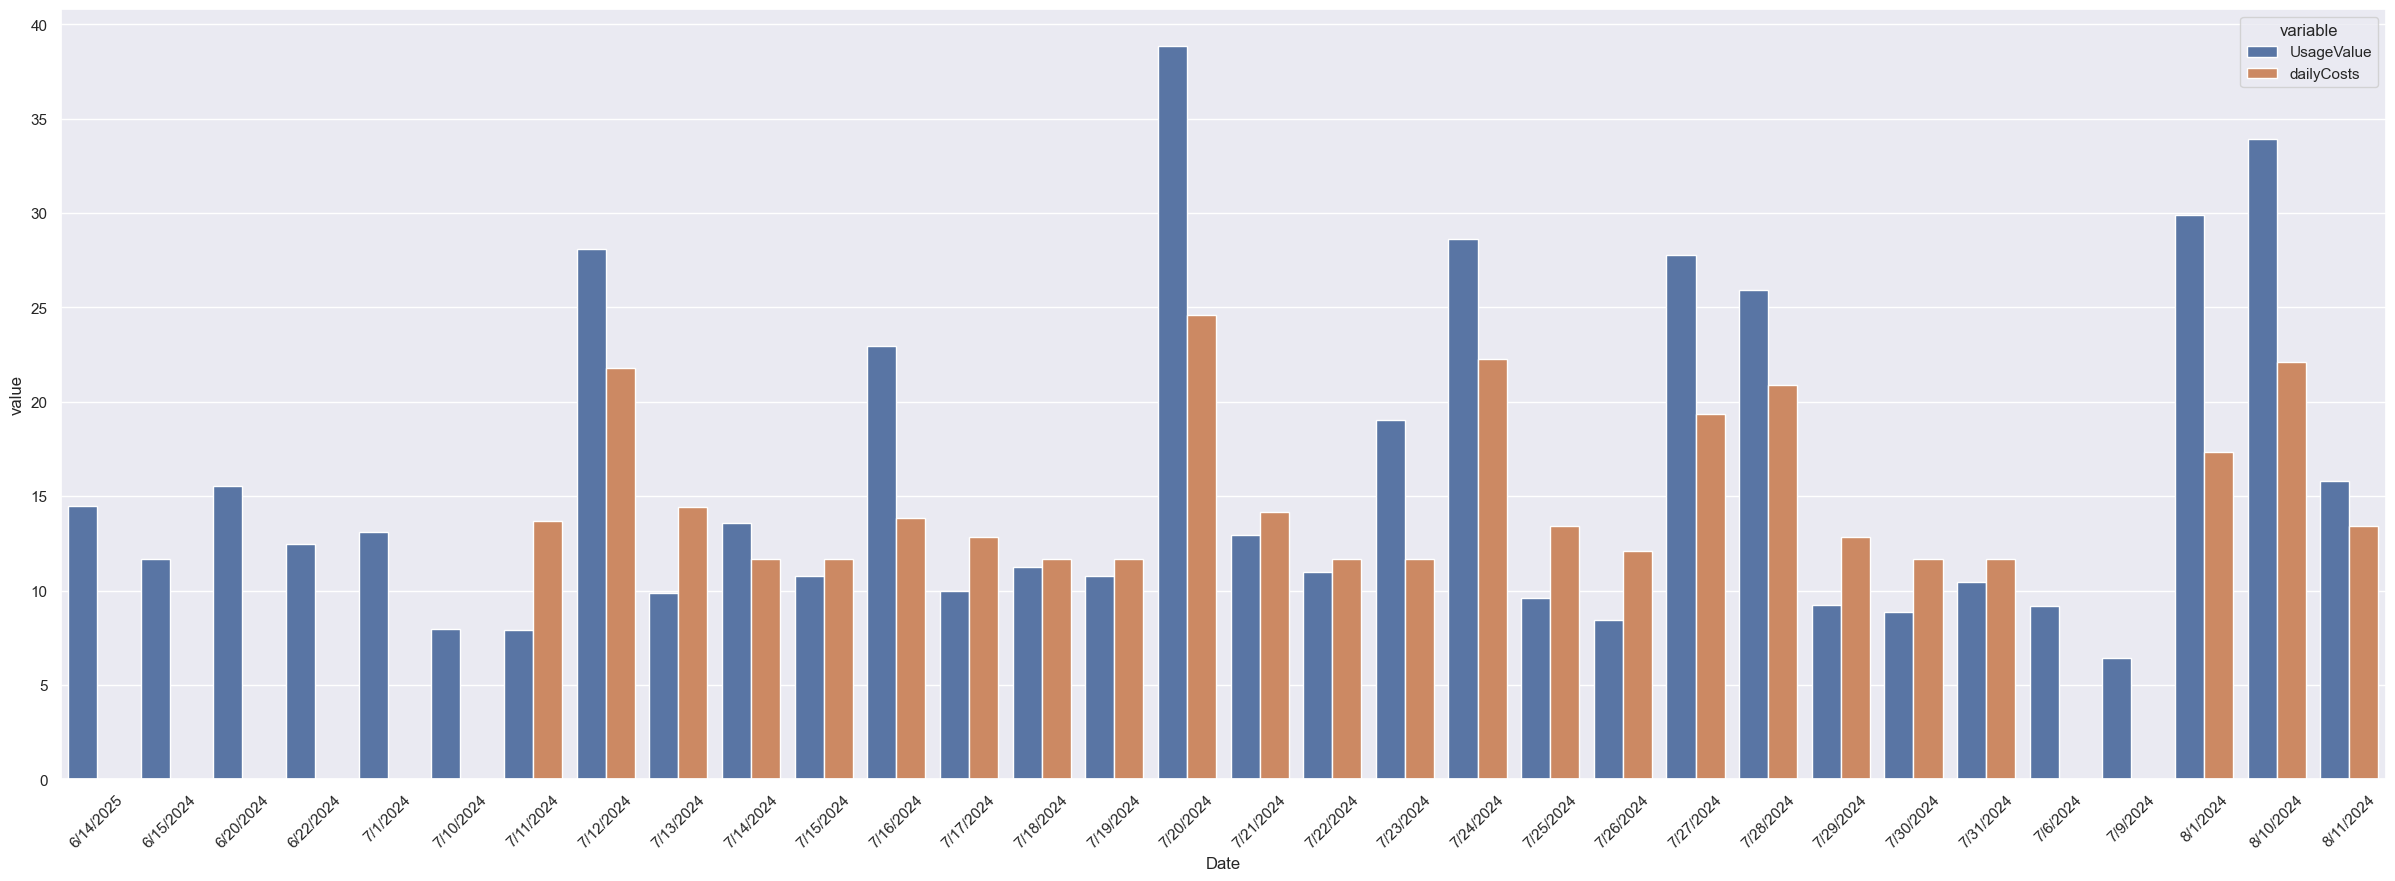

In [112]:
Value2 = pd.melt(Value, id_vars='Date', value_vars=['UsageValue', 'dailyCosts'])
sns.set(rc={"figure.figsize":(30, 10)})
sns.barplot(data=Value2, x="Date", y="value", hue="variable")
plt.xticks(rotation=45)

In [113]:
TotalUsageValue = float(Value['UsageValue'].sum())
TotaldailyCosts = float(Value['dailyCosts'].sum())
ValueDelta = TotalUsageValue - TotaldailyCosts
savings = ((TotalUsageValue/TotaldailyCosts)-1)*100

print("Combined home and EV Usage Value = ", f"${TotalUsageValue:,.2f}")
print("Monthly Cost = ", f"${TotaldailyCosts:,.2f}")
print("True Cost Avoidance = ", f"${ValueDelta:,.2f}")
print("% cost avoidance = ", f"{savings:,.2f}%")


Combined home and EV Usage Value =  $506.41
Monthly Cost =  $362.53
True Cost Avoidance =  $143.88
% cost avoidance =  39.69%


In [114]:
(533.94/465.32)-1

0.14746840883692958